# Importovanie knižnic

In [27]:
#Importovanie potrebných knižníc pre jednotlivé príkazy či časti zdrojového kódu.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve,auc,ConfusionMatrixDisplay
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN,SMOTE
from sklearn.naive_bayes import GaussianNB  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


%matplotlib inline
sns.set()
pd.set_option ('display.max_columns', 50)

# Priprava datasetu

In [28]:
#Načítanie dát z csv súboru do datasetu data pomocou príkazu pd.read_csv, následne premenovanie stĺpcov a vytvorenie nového csv súboru v ktorom budú už premenované stlpce atribútov.
data = pd.read_csv('bank-additional-full.csv')#Načítanie dát do premennej
data.columns = ['Columns']#Pomenovanie stlpca na Columns
split = data["Columns"].str.split(pat=';',expand=True)#Rozdelenie stlpca Columns podľa separátora ;
split.to_csv('bank_4.csv')#Uloženie upraveného datasetu do súboru bank_4.csv
bank = pd.read_csv('bank_4.csv')#Načítanie dát do premennej rovnako ako v prvom prípade.
bank.drop('Unnamed: 0',inplace=True, axis=1)#Odstránenie indexovacieho atribútu Unnamed: 0
bank = bank.rename(columns = {'0':'vek',
                              '1':'povolanie',    
                              '2':'r_stav',
                              '3':'vzdelanie',
                              '4':'podlžnosti',
                              '5' : 'úver_bývanie', 
                              '6' : 'osobný_úver',
                              '7' : 'typ_kontaktu', 
                              '8' : 'mesiac',
                              '9' : 'deň', 
                              '10' : 'dĺžka_kontaktu',
                              '11' : 'počet_kontaktov', 
                              '12' : 'dni_posledný_kontakt',
                              '13' : 'predchádzajúce_kontakty', 
                              '14' : 'výsledok_pred_kampaň', 
                              '15' : 'zmena_zamestnanosti', 
                              '16' : 'idx_cien_spotrebiteľov',
                              '17' : 'idx_spotrebiteľ_dôvery', 
                              '18' : 'euriborn3m', 
                              '19' : 'počet_zamestnancov', 
                              '20' : 'y'})#Premenovanie stlpcov z čísel na názvy.


#Vyvorenie dvoch nových súborov, ktoré v akutalnom stave budú obsahovať rovnaké dáta. Tieto datasety budú slúžiť na vytvorenie dvoch rozdielnych datasetov a to jeden, ktorý bude mať podstránené určité dáta a druhý, ktorý tie dáta mať odstránené nebude.
bank.to_csv('final.csv')
bank.to_csv('final2.csv')
bank2 = pd.read_csv('final2.csv')
bank2.drop('Unnamed: 0',inplace=True, axis=1)
# pomocou funkcii .drop sme v datasete bank a bank2 odstránili stĺpec Unnamed: 9 ktorý nám vznikol po načpitaní datasetu.

In [29]:
#pomocou tohot príkazu sme si zobrazili časť dát potrebnú pre kontrolu či sú dáta správne rozdelené
bank.head()

,vek,povolanie,r_stav,vzdelanie,podlžnosti,úver_bývanie,osobný_úver,typ_kontaktu,mesiac,deň,dĺžka_kontaktu,počet_kontaktov,dni_posledný_kontakt,predchádzajúce_kontakty,výsledok_pred_kampaň,zmena_zamestnanosti,idx_cien_spotrebiteľov,idx_spotrebiteľ_dôvery,euriborn3m,počet_zamestnancov,y
0,56,"""housemaid""","""married""","""basic.4y""","""no""","""no""","""no""","""telephone""","""may""","""mon""",261,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191.0,"""no"""
1,57,"""services""","""married""","""high.school""","""unknown""","""no""","""no""","""telephone""","""may""","""mon""",149,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191.0,"""no"""
2,37,"""services""","""married""","""high.school""","""no""","""yes""","""no""","""telephone""","""may""","""mon""",226,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191.0,"""no"""
3,40,"""admin.""","""married""","""basic.6y""","""no""","""no""","""no""","""telephone""","""may""","""mon""",151,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191.0,"""no"""
4,56,"""services""","""married""","""high.school""","""no""","""no""","""yes""","""telephone""","""may""","""mon""",307,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191.0,"""no"""


# Zistovanie početnosti neznamych v datasete
V tejto časti sme si pomocou print funkcie skontrolovali aké hodnoty nadobúdajú a zistili že atribút podlžnosti obsahuje veľke množstvo unknown hodnot, tento atribut neskor odstránime


In [30]:
print(bank['povolanie'].value_counts())#Zobrazenie početnosti atribútu povolanie kedy vidíme že najpočetnejšou hodnotou je admin a druhou je blue-collar

povolanie
"admin."           10422
"blue-collar"       9254
"technician"        6743
"services"          3969
"management"        2924
"retired"           1720
"entrepreneur"      1456
"self-employed"     1421
"housemaid"         1060
"unemployed"        1014
"student"            875
"unknown"            330
Name: count, dtype: int64


In [31]:
print(bank['r_stav'].value_counts())#Zobrazenie početnosti atribútu r_stav kedy vidíme že najpočetnejšou hodnotou je married a druhou je single

r_stav
"married"     24928
"single"      11568
"divorced"     4612
"unknown"        80
Name: count, dtype: int64


In [32]:
print(bank['vzdelanie'].value_counts())#Zobrazenie početnosti atribútu vzdelanie kedy vidíme že najpočetnejšou hodnotou je university.degree a druhou je high.school

vzdelanie
"university.degree"      12168
"high.school"             9515
"basic.9y"                6045
"professional.course"     5243
"basic.4y"                4176
"basic.6y"                2292
"unknown"                 1731
"illiterate"                18
Name: count, dtype: int64


In [33]:
print(bank['podlžnosti'].value_counts())#Zobrazenie početnosti atribútu podlžnosti kedy vidíme že najpočetnejšou hodnotou je no a druhou je unknown.
#Pre veľke množstvo hodnôt uknown sme sa rozhodli že tento atribút odstránime.

podlžnosti
"no"         32588
"unknown"     8597
"yes"            3
Name: count, dtype: int64


In [34]:
print(bank['úver_bývanie'].value_counts())#Zobrazenie početnosti atribútu úver kedy vidíme že najpočetnejšou hodnotou je yes a druhou je no. Unknow hodnoty sme v tomto prípade odstránili a ostatné hodnoty sme nechali.


úver_bývanie
"yes"        21576
"no"         18622
"unknown"      990
Name: count, dtype: int64


In [35]:
print(bank['osobný_úver'].value_counts())#Zobrazenie početnosti atribútu osobný_úver kedy vidíme že najpočetnejšou hodnotou je no a druhou je yes. Unknow hodnoty sme v tomto prípade odstránili a ostatné hodnoty sme nechali


osobný_úver
"no"         33950
"yes"         6248
"unknown"      990
Name: count, dtype: int64


In [36]:
print(bank['typ_kontaktu'].value_counts())#Zobrazenie početnosti atribútu typ_kontaktu kedy vidíme že najpočetnejšou hodnotou je cellular a druhou je telephone. Tento atribút mal iba 2 možnosti a to cellular a telephone. 


typ_kontaktu
"cellular"     26144
"telephone"    15044
Name: count, dtype: int64


In [37]:
print(bank['dni_posledný_kontakt'].value_counts())#Zobrazenie početnosti atribútu dni_posledný_kontakt kedy vidíme že najpočetnejšou hodnotou je 999 a druhou je 3. Hodnoty 999 predstavujú že daný zákaznik nebol kontaktovaný v predchádzajúcej kampani. Hodnoty, ktoré nadobúda daný atibút predstavujú počet dní, ktoré ubehli od posledného kontaktu v predchádzajúcej kampani.


dni_posledný_kontakt
999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: count, dtype: int64


In [38]:
print(bank['y'].value_counts())#Zobrazenie a kontrola hodnôt cieľového atribútu. V tomto prípade neboli žiadné iné hodnoty ako no a yes, teda nebolo potrebné vykonávať žiadne odstraňovanie iných hodnôt. Avšak bude potrebné tento atribút transformovať z kategorického na numerický pre fázu modelovania.


y
"no"     36548
"yes"     4640
Name: count, dtype: int64


# Ploty atributov

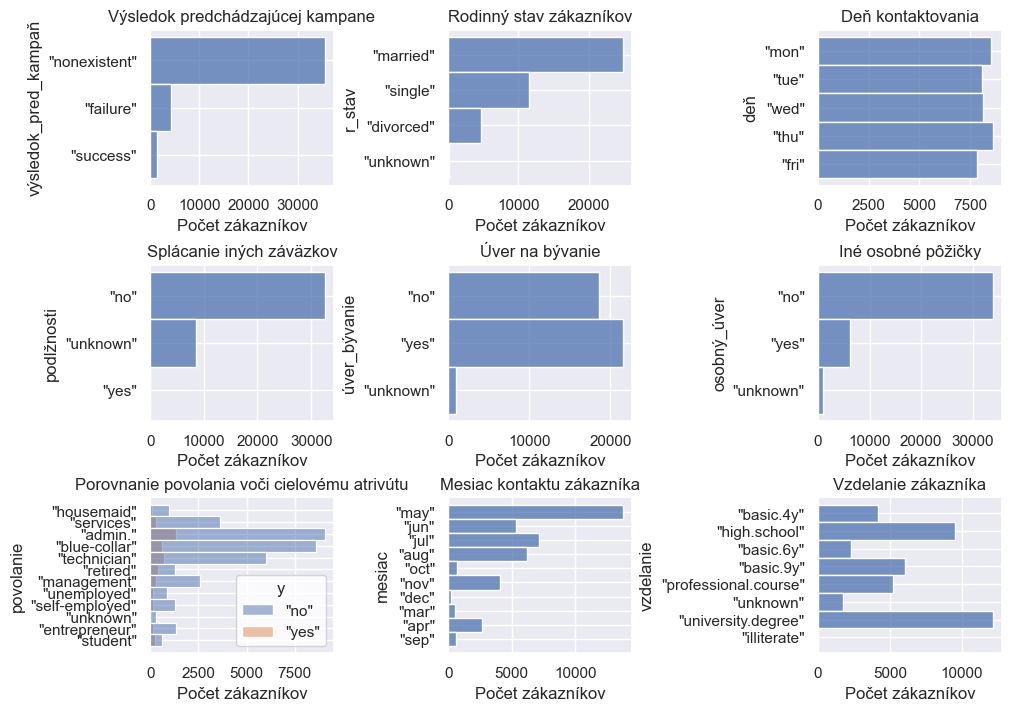

In [39]:
#v tomto bloku sme si pomocou subplotu zobrazili grafy početnosti jednotlivých kategoriálnych atribútov v histogramoch.
fig, axs = plt.subplots(3, 3, constrained_layout=True, figsize=(10, 7))

sns.set_style("whitegrid")
sns.histplot(data=bank, y="výsledok_pred_kampaň", ax=axs[0, 0])#Zobrazenie početnosti atribútu výsledok_pred_kampaň pomocou funkcie grafu histplot
axs[0, 0].set_title("Výsledok predchádzajúcej kampane")
axs[0,0].set_xlabel("Počet zákazníkov")

sns.histplot(data=bank, y="r_stav", ax=axs[0, 1])#Zobrazenie početnosti atribútu r_stav pomocou funkcie grafu histplot
axs[0, 1].set_title("Rodinný stav zákazníkov")
axs[0,1].set_xlabel("Počet zákazníkov")

sns.histplot(data=bank, y="deň", ax=axs[0, 2])#Zobrazenie početnosti atribútu deň pomocou funkcie grafu histplot
axs[0, 2].set_title("Deň kontaktovania")
axs[0,2].set_xlabel("Počet zákazníkov")

sns.histplot(data=bank, y="podlžnosti", ax=axs[1, 0])#Zobrazenie početnosti atribútu podlžnosti pomocou funkcie grafu histplot
axs[1, 0].set_title("Splácanie iných záväzkov")
axs[1,0].set_xlabel("Počet zákazníkov")

sns.histplot(data=bank, y="úver_bývanie", ax=axs[1, 1])#Zobrazenie početnosti atribútu úver_bývanie pomocou funkcie grafu histplot
axs[1, 1].set_title("Úver na bývanie")
axs[1,1].set_xlabel("Počet zákazníkov")

sns.histplot(data=bank, y="osobný_úver", ax=axs[1, 2])#Zobrazenie početnosti atribútu osobný_úver pomocou funkcie grafu histplot
axs[1, 2].set_title("Iné osobné pôžičky")
axs[1,2].set_xlabel("Počet zákazníkov")

sns.histplot(bank,y="povolanie",hue="y", ax=axs[2,0])#Zobrazenie početnosti atribútu povolanie a rozdelenie či na základe povolania využil službu alebo nie, pomocou funkcie grafu histplot
axs[2,0].set_title("Porovnanie povolania voči cielovému atrivútu")
axs[2,0].set_xlabel("Počet zákazníkov")

sns.histplot(bank,y="mesiac",ax=axs[2,1])#Zobrazenie početnosti atribútu mesiac pomocou funkcie grafu histplot
axs[2, 1].set_title("Mesiac kontaktu zákazníka")
axs[2,1].set_xlabel("Počet zákazníkov")

sns.histplot(bank,y="vzdelanie",ax=axs[2,2])#Zobrazenie početnosti atribútu vzdelanie pomocou funkcie grafu histplot
axs[2, 2].set_title("Vzdelanie zákazníka")
axs[2,2].set_xlabel("Počet zákazníkov")

plt.show()

# Korelacna tabulka

In [40]:
#v tomto bloku sme pomocou funkcie corr_table vytvorili korelačnú maticu pre numerické atribúty a následne ju pomocou heat map zobrazili graficky.
numerical_atributes = ['vek','dĺžka_kontaktu','počet_kontaktov','dni_posledný_kontakt','predchádzajúce_kontakty','zmena_zamestnanosti','idx_cien_spotrebiteľov','idx_spotrebiteľ_dôvery','euriborn3m', 'počet_zamestnancov']
corr_table = bank[numerical_atributes].corr()
corr_table

,vek,dĺžka_kontaktu,počet_kontaktov,dni_posledný_kontakt,predchádzajúce_kontakty,zmena_zamestnanosti,idx_cien_spotrebiteľov,idx_spotrebiteľ_dôvery,euriborn3m,počet_zamestnancov
vek,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
dĺžka_kontaktu,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
počet_kontaktov,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
dni_posledný_kontakt,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
predchádzajúce_kontakty,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
zmena_zamestnanosti,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
idx_cien_spotrebiteľov,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
idx_spotrebiteľ_dôvery,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euriborn3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
počet_zamestnancov,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


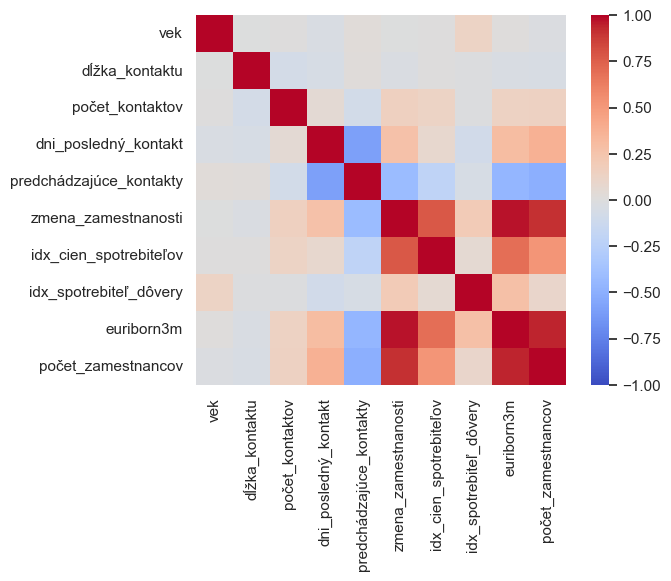

In [41]:
p = sns.heatmap(corr_table, 
                xticklabels=corr_table.columns, yticklabels=corr_table.columns,
                vmin=-1,vmax=1,
                cmap='coolwarm',
                square=True)
#Ako možeme vidieť na korelačnej matici najvyššia kladná korelácia bola medzi atribútmi zmena_zamestnanosti a euriborn3m a to 0.9722. Medzi atribútmi zmena_zamestnanosti a počet_zamestnancov bola kladná korelácia 0.9070. 
#Najväčšia záporná korelácia bola medzi atribútmi predchádzajúce_kontakty a dni_posledný_kontakt a jej hodnota bola -0.5875. Druhá najväčšia korelácia nastala medzi atribútmi predchadzájúce_kontakty a počet_zamestnancov a hodnota tejto korelácie bola -0.5013.

# chi-test

In [42]:
# v následovnom bloku sme vykonali porovnanie kategorických atribútov s cieľovým atribútom pomocou chi-kvadrát testu a výsledky sme si vypísali.
contingency_table = pd.crosstab(bank['povolanie'], bank['y'])#Vytvornie kontingenčnej tabuľky pre atribúty povolanie a y a následné vypočítanie hodnôt chi2 a p_value pre dané atribúty.
chi2_stat, p_val, _, _ = chi2_contingency(contingency_table)
print("-------------------povolanie-------------------")
print("Chi-squared statistic:", chi2_stat)
print("P-value:", p_val)

contingency_table = pd.crosstab(bank['r_stav'], bank['y'])#Vytvornie kontingenčnej tabuľky pre atribúty r_stav a y a následné vypočítanie hodnôt chi2 a p_value pre dané atribúty.
chi2_stat, p_val, _, _ = chi2_contingency(contingency_table)
print("-------------------r_stav-------------------")
print("Chi-squared statistic:", chi2_stat)
print("P-value:", p_val)

contingency_table = pd.crosstab(bank['vzdelanie'], bank['y'])#Vytvornie kontingenčnej tabuľky pre atribúty vzdelanie a y a následné vypočítanie hodnôt chi2 a p_value pre dané atribúty.
chi2_stat, p_val, _, _ = chi2_contingency(contingency_table)
print("-------------------vzdelanie-------------------")
print("Chi-squared statistic:", chi2_stat)
print("P-value:", p_val)

contingency_table = pd.crosstab(bank['podlžnosti'], bank['y'])#Vytvornie kontingenčnej tabuľky pre atribúty podlžnosti a y a následné vypočítanie hodnôt chi2 a p_value pre dané atribúty.
chi2_stat, p_val, _, _ = chi2_contingency(contingency_table)
print("-------------------podlžnosti-------------------")
print("Chi-squared statistic:", chi2_stat)
print("P-value:", p_val)

contingency_table = pd.crosstab(bank['úver_bývanie'], bank['y'])#Vytvornie kontingenčnej tabuľky pre atribúty úver_bývanie a y a následné vypočítanie hodnôt chi2 a p_value pre dané atribúty.
chi2_stat, p_val, _, _ = chi2_contingency(contingency_table)
print("-------------------uver_byvanie-------------------")
print("Chi-squared statistic:", chi2_stat)
print("P-value:", p_val)

contingency_table = pd.crosstab(bank['osobný_úver'], bank['y'])#Vytvornie kontingenčnej tabuľky pre atribúty osobný_úver a y a následné vypočítanie hodnôt chi2 a p_value pre dané atribúty.
chi2_stat, p_val, _, _ = chi2_contingency(contingency_table)
print("-------------------osobny_uver-------------------")
print("Chi-squared statistic:", chi2_stat)
print("P-value:", p_val)

contingency_table = pd.crosstab(bank['typ_kontaktu'], bank['y'])#Vytvornie kontingenčnej tabuľky pre atribúty typ_kontaktu a y a následné vypočítanie hodnôt chi2 a p_value pre dané atribúty.
chi2_stat, p_val, _, _ = chi2_contingency(contingency_table)
print("-------------------typ_kontaktu-------------------")
print("Chi-squared statistic:", chi2_stat)
print("P-value:", p_val)

contingency_table = pd.crosstab(bank['mesiac'], bank['y'])#Vytvornie kontingenčnej tabuľky pre atribúty mesiac a y a následné vypočítanie hodnôt chi2 a p_value pre dané atribúty.
chi2_stat, p_val, _, _ = chi2_contingency(contingency_table)
print("-------------------mesiac-------------------")
print("Chi-squared statistic:", chi2_stat)
print("P-value:", p_val)

contingency_table = pd.crosstab(bank['deň'], bank['y'])#Vytvornie kontingenčnej tabuľky pre atribúty deň a y a následné vypočítanie hodnôt chi2 a p_value pre dané atribúty.
chi2_stat, p_val, _, _ = chi2_contingency(contingency_table)
print("-------------------den-------------------")
print("Chi-squared statistic:", chi2_stat)
print("P-value:", p_val)

contingency_table = pd.crosstab(bank['výsledok_pred_kampaň'], bank['y'])#Vytvornie kontingenčnej tabuľky pre atribúty výsledok_pred_kampaň a y a následné vypočítanie hodnôt chi2 a p_value pre dané atribúty.
chi2_stat, p_val, _, _ = chi2_contingency(contingency_table)
print("-------------------vysledok_pred_kampan-------------------")
print("Chi-squared statistic:", chi2_stat)
print("P-value:", p_val)


-------------------povolanie-------------------
Chi-squared statistic: 961.2424403289555
P-value: 4.189763287563623e-199
-------------------r_stav-------------------
Chi-squared statistic: 122.65515182252989
P-value: 2.068014648442211e-26
-------------------vzdelanie-------------------
Chi-squared statistic: 193.10590454149565
P-value: 3.3051890144025054e-38
-------------------podlžnosti-------------------
Chi-squared statistic: 406.5775146420093
P-value: 5.161957951391637e-89
-------------------uver_byvanie-------------------
Chi-squared statistic: 5.684495858974168
P-value: 0.05829447669453452
-------------------osobny_uver-------------------
Chi-squared statistic: 1.094027551150338
P-value: 0.5786752870441754
-------------------typ_kontaktu-------------------
Chi-squared statistic: 862.3183642075705
P-value: 1.525985652312996e-189
-------------------mesiac-------------------
Chi-squared statistic: 3101.149351411678
P-value: 0.0
-------------------den-------------------
Chi-squared s

# Odstránenie atributov

In [43]:
#v tomto bloku sme si definovali si najprv definovali atribúty ktoré chcem odstrániť z prislušnych datasetov tieto atributy su v premennych atributes_to_drop a atribute_to_drop a následne sme ich odstránili z daných datasetov pomocou funkcie .drop
atributes_to_drop = ['osobný_úver','mesiac','výsledok_pred_kampaň','podlžnosti']
atribute_to_drop = ['podlžnosti']
bank = bank.drop(atribute_to_drop,axis='columns')
bank2 = bank2.drop(atributes_to_drop,axis='columns')

#následne sme v datasete hodnoty ktoré boli unknown nahradili hodnotami NA a odstránili pomocou funkcie dropna následne sme vykonali kontrolu či daný dataset ešte obsahuje unknown hodnoty tento postup sme opakovali pre oba datasety
column_names = bank.columns
column_names2 = bank2.columns
print(column_names)
bank[column_names] = bank[column_names].replace('"unknown"',pd.NA)#Nahradenie "unknown" hodnôt hodnotami NA
bank = bank.dropna()#Odstránenie hodnôt NA z datasetu bank
print(bank[column_names].isna().count())
bank[column_names] = bank[column_names].replace('"', '')

print(column_names2)
bank2[column_names2] = bank2[column_names2].replace('"unknown"',pd.NA)#Nahradenie "unknown" hodnôt hodnotami NA
bank2 = bank2.dropna()#Odstránenie hodnôt NA z datasetu bank2
print(bank2[column_names2].isna().count())
bank2[column_names2] = bank2[column_names2].replace('"', '')
print(bank2['y'])

Index(['vek', 'povolanie', 'r_stav', 'vzdelanie', 'úver_bývanie',
       'osobný_úver', 'typ_kontaktu', 'mesiac', 'deň', 'dĺžka_kontaktu',
       'počet_kontaktov', 'dni_posledný_kontakt', 'predchádzajúce_kontakty',
       'výsledok_pred_kampaň', 'zmena_zamestnanosti', 'idx_cien_spotrebiteľov',
       'idx_spotrebiteľ_dôvery', 'euriborn3m', 'počet_zamestnancov', 'y'],
      dtype='object')
vek                        38245
povolanie                  38245
r_stav                     38245
vzdelanie                  38245
úver_bývanie               38245
osobný_úver                38245
typ_kontaktu               38245
mesiac                     38245
deň                        38245
dĺžka_kontaktu             38245
počet_kontaktov            38245
dni_posledný_kontakt       38245
predchádzajúce_kontakty    38245
výsledok_pred_kampaň       38245
zmena_zamestnanosti        38245
idx_cien_spotrebiteľov     38245
idx_spotrebiteľ_dôvery     38245
euriborn3m                 38245
počet_zamestn

# Transformovanie kategorických atribútov

In [44]:
#Pre transformáciu kategorických atribútov na numerické hodnoty sme používali funkciu LabelEncoder. Najprv sme si vytvorili samotný ekóder v premennej ecn a následne sme ho implementovali na naše atribúty v oboch datasetoch
ecn = LabelEncoder()#Vytvorenie LabelEncoderu

#Transformácia kategorických atriútov na numerické hodnoty pre dataset bank
bank['povolanie'] = ecn.fit_transform(bank['povolanie'])
bank['r_stav'] = ecn.fit_transform(bank['r_stav'])
bank['vzdelanie'] = ecn.fit_transform(bank['vzdelanie'])
bank['typ_kontaktu'] = ecn.fit_transform(bank['typ_kontaktu'])
bank['mesiac'] = ecn.fit_transform(bank['mesiac'])
bank['výsledok_pred_kampaň'] = ecn.fit_transform(bank['výsledok_pred_kampaň'])
bank['y'] = ecn.fit_transform(bank['y'])
bank['úver_bývanie'] = ecn.fit_transform(bank['úver_bývanie'])
bank['osobný_úver'] = ecn.fit_transform(bank['osobný_úver'])
bank['deň'] = ecn.fit_transform(bank['deň'])
#Transformácia kategorických atriútov na numerické hodnoty pre dataset bank2
bank2['povolanie'] = ecn.fit_transform(bank2['povolanie'])
bank2['r_stav'] = ecn.fit_transform(bank2['r_stav'])
bank2['vzdelanie'] = ecn.fit_transform(bank2['vzdelanie'])
bank2['typ_kontaktu'] = ecn.fit_transform(bank2['typ_kontaktu'])
bank2['y'] = ecn.fit_transform(bank2['y'])
bank2['úver_bývanie'] = ecn.fit_transform(bank2['úver_bývanie'])
bank2['deň'] = ecn.fit_transform(bank2['deň'])

# Normalizácia atributov

In [45]:
attributes_to_normalize = ['vek', 'dĺžka_kontaktu', 'počet_kontaktov', 'dni_posledný_kontakt', 'predchádzajúce_kontakty', 
                           'zmena_zamestnanosti', 'idx_cien_spotrebiteľov', 'idx_spotrebiteľ_dôvery', 'euriborn3m', 'počet_zamestnancov']#Vybrané atribúty, ktoré je potrebné normalizovať

#V tomto bloku sme pomocou minmaxscaler funkcie normalizovlai dáta, ktoré sme si na základe toho že dané atribúty boli v rozdielnych jednotkách a a veľkých rozsahoch
scaler = MinMaxScaler() #Vz
bank[attributes_to_normalize] = scaler.fit_transform(bank[attributes_to_normalize])
bank2[attributes_to_normalize] = scaler.fit_transform(bank2[attributes_to_normalize])

# Vytvorenie Train test množiny

In [46]:
#V tomto bloku sme pomocou funkcie train_test_split vytvorili z naších dvoch datasetov trénovacie a testovacie množiny pre jednotlivé datasety.
x = bank.drop("y",axis=1)#Pridanie atribútov datasetu bank do premennej x s odstránením cieľového atribútu.
y = bank["y"]#Priradenie cieľového atribútu z datasetu bank do premennej y.
train_data1,test_data1,train_label1,test_label1 = train_test_split(x,y,test_size=0.3,stratify=y,random_state=1)#Vytvorenie trénovacích a testovacích množín.

x2 = bank2.drop("y",axis=1)#Pridanie atribútov datasetu bank2 do premennej x2 s odstránením cieľového atribútu.
y2 = bank2["y"]#Priradenie cieľového atribútu z datasetu bank do premennej y2.
train_data2,test_data2,train_label2,test_label2 = train_test_split(x2,y2,test_size=0.3,stratify=y,random_state=1)#Vytvorenie trénovacích a testovacích množín.


# ADASYN oversampling

In [47]:
#v tomto bloku sme vytvárali pre oba naše datasety množiny ktoré boli doplnené o dovzorkované dáta a v tomto prípade a bloku bola použitá samplovacia metóda ADASYN.
#v tejto monžine sme samplovali minoritnú triedu nášho cieľového atribútu s počtom susedov 11, parameter random state sme použili pre stálosť jednotlivých dát. Dané množiny boli v pomere 70-30 v oboch prípadoch
# do premenných x_train_adasyn,y_train_adasyn sme uložili dosamplované trénovacie dáta, postup pri vytvarani bol pri oboch datasetov rovnaký rozidel je iba v názve premenných ku ktorý sme pre rýchlejšie písanie pridali 2 na koniec každého názvu premennej
new_bank_adasyn  = pd.DataFrame(train_data2, columns=bank2.columns)
new_bank_adasyn['y'] = train_label2
x_adasyn = new_bank_adasyn.drop("y",axis=1)#Pridanie atribútov datasetu new_bank_adasyn do premennej x_adasyn s odstránením cieľového atribútu.
y_adasyn = new_bank_adasyn["y"]#Priradenie cieľového atribútu z datasetu new_bank_adasyn do premennej y_adasyn.
adasyn = ADASYN(sampling_strategy='minority', random_state=1, n_neighbors=11)#Zostavenie vzorkovacieho modelu ADASYN pre minoritnú triedu s atribútom najbližších susedov nastavenom na 11. Na datasete, ktorý má odstránené atribúty na základe chi-kvadrát testu.
x_train_adasyn, y_train_adasyn = adasyn.fit_resample(x_adasyn,y_adasyn)#Vytvorenie navzorkovaných množín ADASYN


new_bank_adasyn2 = pd.DataFrame(train_data1, columns=bank.columns)#Premenovanie stlpcov nového datasetu názvami dataset bank
new_bank_adasyn2['y'] = train_label1
x_adasyn2 = new_bank_adasyn2.drop("y",axis=1)#Pridanie atribútov datasetu new_bank_adasyn2 do premennej x_adasyn2 s odstránením cieľového atribútu.
y_adasyn2 = new_bank_adasyn2["y"]#Priradenie cieľového atribútu z datasetu new_bank_adasyn2 do premennej y_adasyn2.

adasyn2 = ADASYN(sampling_strategy='minority', random_state=1, n_neighbors=11)#Zostavenie vzorkovacieho modelu ADASYN pre minoritnú triedu s atribútom najbližších susedov nastavenom na 11. Na datasete, ktorý nemá odstránené atribúty na základe chi-kvadrát testu.
x_train_adasyn2, y_train_adasyn2 = adasyn2.fit_resample(x_adasyn2,y_adasyn2)#Vytvorenie navzorkovaných množín ADASYN2


# SMOTE oversampling

In [48]:
#v tomto bloku sme vytvárali pre oba naše datasety množiny ktoré boli doplnené o dovzorkované dáta a v tomto prípade a bloku bola použitá samplovacia metóda SMOTE.
#v tejto monžine sme samplovali minoritnú triedu nášho cieľového atribútu, parameter random state sme použili pre stálosť jednotlivých dát. Dané množiny boli v pomere 70-30 v oboch prípadoch
# do premenných x_train_smote,y_train_smote sme uložili dosamplované trénovacie dáta, postup pri vytvarani bol pri oboch datasetoch rovnaký rozidel je iba v názve premenných ku ktorý sme pre rýchlejšie písanie pridali 2 na koniec každého názvu premennej
new_bank_smote = pd.DataFrame(train_data2, columns=bank2.columns)#Premenovanie stlpcov nového datasetu názvami dataset bank2
new_bank_smote['y'] = train_label2
x_smote = new_bank_smote.drop("y", axis=1)#Pridanie atribútov datasetu new_bank_smote do premennej x_smote s odstránením cieľového atribútu.
y_smote = new_bank_smote["y"]#Priradenie cieľového atribútu z datasetu new_bank_smote do premennej y_smote.
smote = SMOTE(sampling_strategy='minority', random_state=1)#Zostavenie vzorkovacieho modelu SMOTE pre minoritnú triedu. Na datasete, ktorý má odstránené atribúty na základe chi-kvadrát testu.
x_train_smote, y_train_smote = smote.fit_resample(x_smote,y_smote)#Vytvorenie navzorkovaných množín SMOTE.

new_bank_smote2 = pd.DataFrame(train_data1, columns=bank.columns)#Premenovanie stlpcov nového datasetu názvami dataset bank
new_bank_smote2['y'] = train_label1
x_smote2 = new_bank_smote2.drop("y", axis=1)#Pridanie atribútov datasetu new_bank_smote2 do premennej x_smote2 s odstránením cieľového atribútu.
y_smote2 = new_bank_smote2["y"]#Priradenie cieľového atribútu z datasetu new_bank_smote2 do premennej y_smote2.
smote2 = SMOTE(sampling_strategy='minority', random_state=1)#Zostavenie vzorkovacieho modelu SMOTE pre minoritnú triedu. Na datasete, ktorý nemá odstránené atribúty na základe chi-kvadrát testu.
x_train_smote2, y_train_smote2 = smote2.fit_resample(x_adasyn2,y_adasyn2)#Vytvorenie navzorkovaných množín SMOTE2.


# Bayes

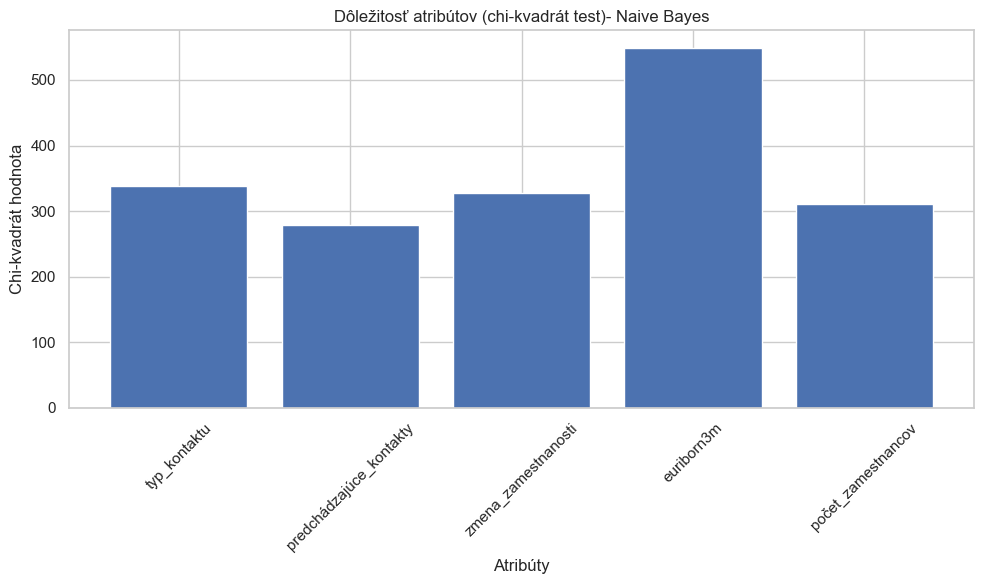

[[9018 1179]
 [ 531  746]]
              precision    recall  f1-score   support

           0     0.9444    0.8844    0.9134     10197
           1     0.3875    0.5842    0.4660      1277

    accuracy                         0.8510     11474
   macro avg     0.6660    0.7343    0.6897     11474
weighted avg     0.8824    0.8510    0.8636     11474



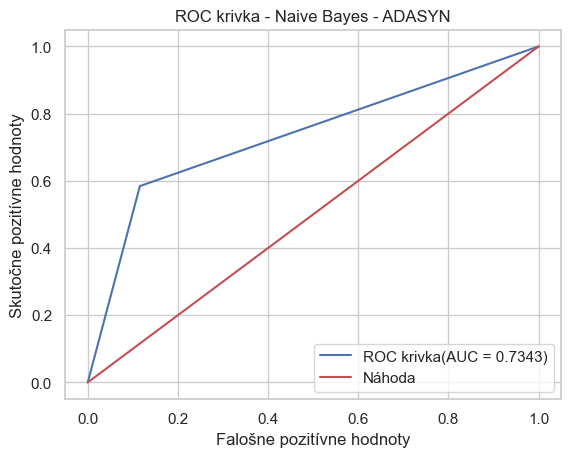

AUC: 0.7342797169834141


In [49]:
#Naive Bayes bez nad vzorkovania
#Vytvorenie modelu Nive Bayes a následne trenovanie a vytvorenie novej klasifikácie.
modelBA = GaussianNB()
modelBA.fit(train_data2, train_label2)
resultB = modelBA.predict(test_data2)

#Výber najdôležitejších 5 atributov a ich zobrazenie zobrazenie.
selector = SelectKBest(chi2, k=5)  
selected_train_data = selector.fit_transform(train_data2, train_label2)
selected_indices = selector.get_support(indices=True)
selected_feature_names = [train_data2.columns[i] for i in selected_indices]
#Zobrazenie grafu s dôležitých atribútov.
plt.figure(figsize=(10, 6))
plt.bar(selected_feature_names, selector.scores_[selected_indices])
plt.xlabel("Atribúty")
plt.ylabel("Chi-kvadrát hodnota")
plt.title("Dôležitosť atribútov (chi-kvadrát test)- Naive Bayes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Zobrazenie matice zámen a reportu klasifikácie.
ct_bayes = confusion_matrix(test_label2, resultB)
print(ct_bayes)
print(classification_report(test_label2, resultB,digits=4))

#Vytvorenie ROC krivky a vypočítanie AUC hodnoty s následným zobrazením ROC krivky a vypísaním AUC hodnoty.
fpraa, tpraa, _ = roc_curve(test_label2, resultB)
roc_aucaa = auc(fpraa, tpraa)

#Zobrazenie grafu ROC krivky a vypísanie samostatného atribútu AUC. V grafe je AUC zobrazene na 4 desatinné miesta.
plt.plot(fpraa, tpraa, color='b', label='ROC krivka(AUC = {:.4f})'.format(roc_aucaa))
plt.plot([0, 1], [0, 1], color='r',label='Náhoda')
plt.xlabel('Falošne pozitívne hodnoty')
plt.ylabel('Skutočne pozitívne hodnoty')
plt.title('ROC krivka - Naive Bayes - ADASYN')
plt.legend(loc='lower right')
plt.show()
print('AUC:', roc_aucaa)


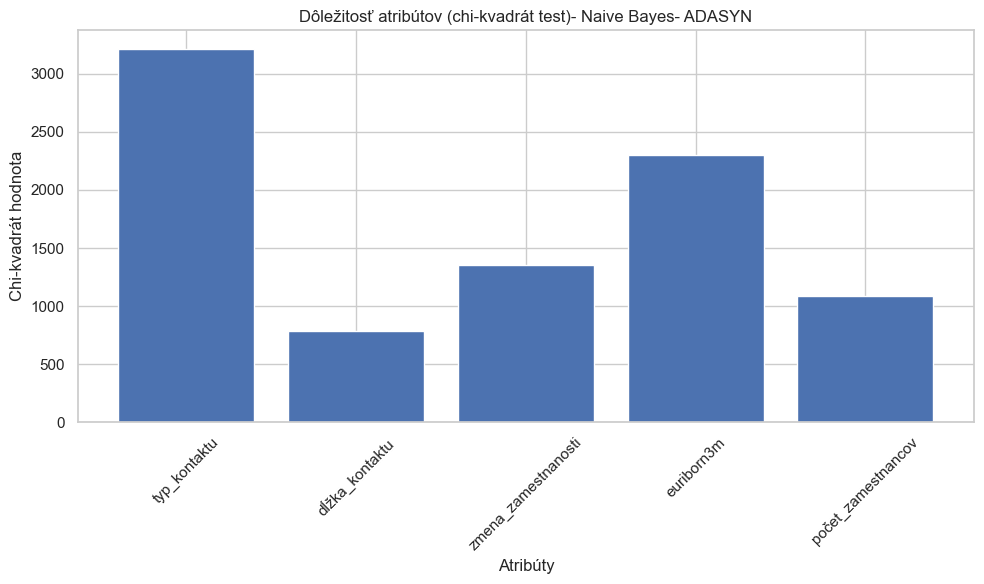

[[7632 2565]
 [ 275 1002]]
              precision    recall  f1-score   support

           0     0.9652    0.7485    0.8431     10197
           1     0.2809    0.7847    0.4137      1277

    accuracy                         0.7525     11474
   macro avg     0.6231    0.7666    0.6284     11474
weighted avg     0.8891    0.7525    0.7953     11474



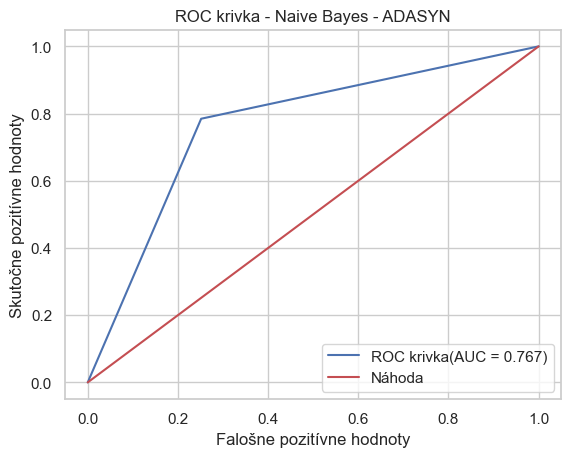

AUC: 0.7665534775417617


In [50]:
##Bayes ADASYN                                                      
#Vytvorenie modelu Nive Bayes a následne trenovanie a vytvorenie novej klasifikácie.
modelBB = GaussianNB()
modelBB.fit(x_train_adasyn, y_train_adasyn)
resultB = modelBB.predict(test_data2)

#Výber najdoležitejších 5 atributov a ich zobrazenie.
selectorA = SelectKBest(chi2, k=5)  
selected_train_dataA = selectorA.fit_transform(x_train_adasyn, y_train_adasyn)
selected_indicesA = selectorA.get_support(indices=True)
selected_feature_namesA = [x_train_adasyn.columns[i] for i in selected_indicesA]
#Zobrazenie grafu s dôležitých atribútov.
plt.figure(figsize=(10, 6))
plt.bar(selected_feature_namesA, selectorA.scores_[selected_indicesA])
plt.xlabel("Atribúty")
plt.ylabel("Chi-kvadrát hodnota")
plt.title("Dôležitosť atribútov (chi-kvadrát test)- Naive Bayes- ADASYN")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Zobrazenie matice zámen a reportu klasifikácie.
ct_bayes_adasyn = confusion_matrix(test_label2, resultB)
print(ct_bayes_adasyn)                        
print(classification_report(test_label2, resultB,digits=4)) 

#Vytvorenie ROC krivky a vypočítanie AUC hodnoty s následným zobrazením ROC krivky a vypísaním AUC hodnoty.
fprab, tprab, _ = roc_curve(test_label2, resultB)
roc_aucab = auc(fprab, tprab)

#Zobrazenie grafu ROC krivky a vypísanie samostatného atribútu AUC. V grafe je AUC zobrazene na 4 desatinné miesta.
plt.plot(fprab, tprab, color='b', label='ROC krivka(AUC = {:.3f})'.format(roc_aucab))
plt.plot([0, 1], [0, 1], color='r',label='Náhoda')
plt.xlabel('Falošne pozitívne hodnoty')
plt.ylabel('Skutočne pozitívne hodnoty')
plt.title('ROC krivka - Naive Bayes - ADASYN')
plt.legend(loc='lower right')
plt.show()
print('AUC:', roc_aucab)


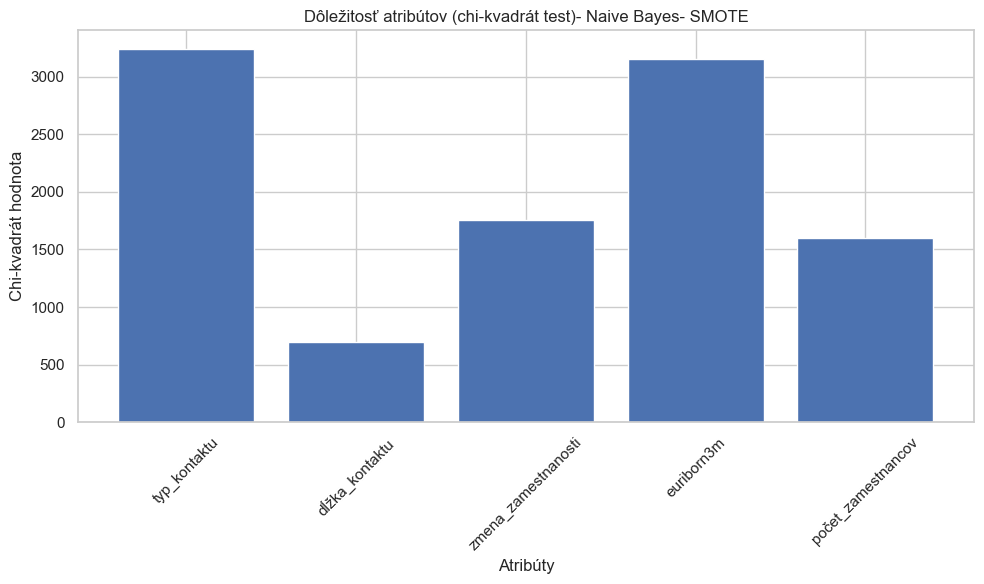

[[7724 2473]
 [ 299  978]]
              precision    recall  f1-score   support

           0     0.9627    0.7575    0.8479     10197
           1     0.2834    0.7659    0.4137      1277

    accuracy                         0.7584     11474
   macro avg     0.6231    0.7617    0.6308     11474
weighted avg     0.8871    0.7584    0.7995     11474



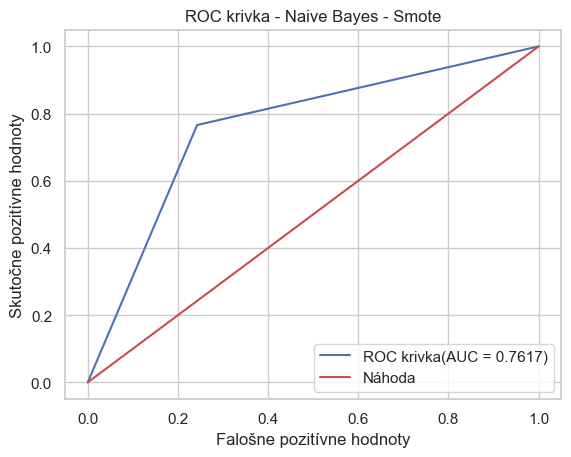

AUC: 0.7616675839908387


In [51]:
##Bayes SMOTE             
#Vytvorenie modelu Naive Bayes a následne trenovanie a vytvorenie novej klasifikácie.
modelBC = GaussianNB()
modelBC.fit(x_train_smote, y_train_smote)
resultB = modelBC.predict(test_data2)

#Výber najdoležitejších 5 atributov a ich zobrazenie.
selectorB = SelectKBest(chi2, k=5)
selected_train_dataB = selectorB.fit_transform(x_train_smote, y_train_smote)
selected_indicesB = selectorB.get_support(indices=True)
selected_feature_namesB = [x_train_smote.columns[i] for i in selected_indicesB]
#Zobrazenie grafu s dôležitých atribútov.
plt.figure(figsize=(10, 6))
plt.bar(selected_feature_namesB, selectorB.scores_[selected_indicesB])
plt.xlabel("Atribúty")
plt.ylabel("Chi-kvadrát hodnota")
plt.title("Dôležitosť atribútov (chi-kvadrát test)- Naive Bayes- SMOTE")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Zobrazenie matice zámen a reportu klasifikácie.
ct_bayes_smote = confusion_matrix(test_label2, resultB)
print(ct_bayes_smote)                        
print(classification_report(test_label2, resultB,digits=4))

#Vytvorenie ROC krivky a vypočítanie AUC hodnoty s následným zobrazením ROC krivky a vypísaním AUC hodnoty.
fprac, tprac, _ = roc_curve(test_label2, resultB)
roc_aucac = auc(fprac, tprac)

#Zobrazenie grafu ROC krivky a vypísanie samostatného atribútu AUC. V grafe je AUC zobrazene na 4 desatinné miesta.
plt.plot(fprac, tprac, color='b', label='ROC krivka(AUC = {:.4f})'.format(roc_aucac))
plt.plot([0, 1], [0, 1], color='r',label='Náhoda')
plt.xlabel('Falošne pozitívne hodnoty')
plt.ylabel('Skutočne pozitívne hodnoty')
plt.title('ROC krivka - Naive Bayes - Smote')
plt.legend(loc='lower right')
plt.show()
print('AUC:', roc_aucac)

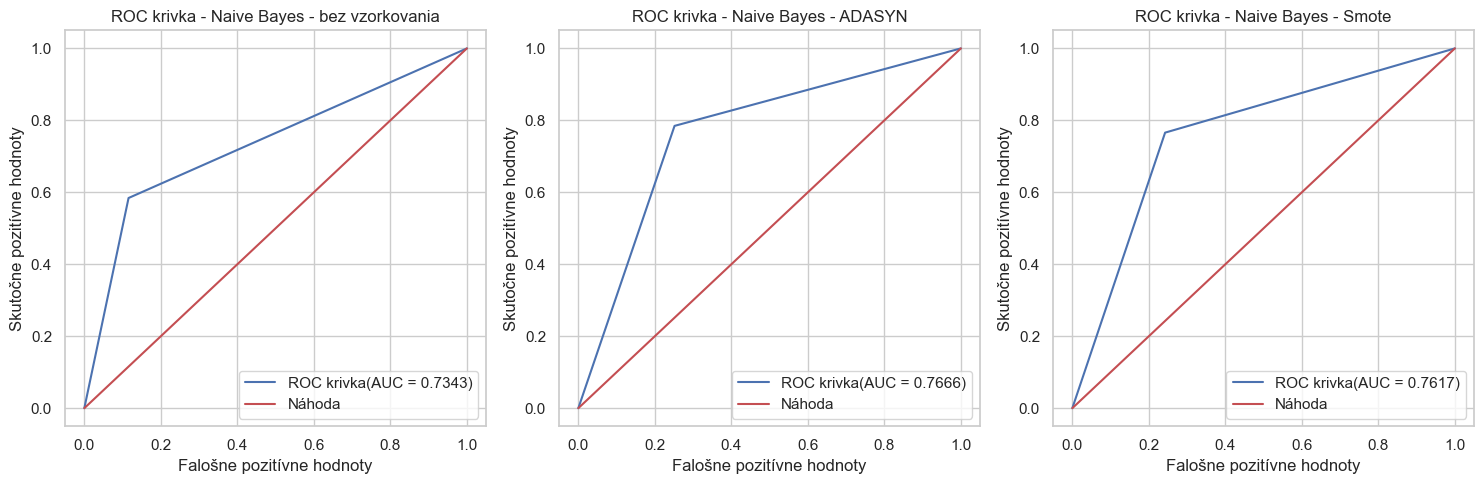

In [52]:
# Vytvorenie grafov ROC kriviek pre Naive Bayes modely s jednotlivými typmi nad vzorkovania. Atriibuty: fpraa,fprab,frpac predstavuju falošne pozitívne hodnoty pre jednotlivé modely a traa,trab,trac predstavuju skutočne pozitívne hodnoty pre jednotlivé modely.
#Bez nad vzorkovania
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.plot(fpraa, tpraa, color='b', label='ROC krivka(AUC = {:.4f})'.format(roc_aucaa))
plt.plot([0, 1], [0, 1], color='r',label='Náhoda')
plt.xlabel('Falošne pozitívne hodnoty')
plt.ylabel('Skutočne pozitívne hodnoty')
plt.title('ROC krivka - Naive Bayes - bez vzorkovania')
plt.legend(loc='lower right')

#ADASYN nad vzorkovanie
plt.subplot(132)
plt.plot(fprab, tprab, color='b', label='ROC krivka(AUC = {:.4f})'.format(roc_aucab))
plt.plot([0, 1], [0, 1], color='r',label='Náhoda')
plt.xlabel('Falošne pozitívne hodnoty')
plt.ylabel('Skutočne pozitívne hodnoty')
plt.title('ROC krivka - Naive Bayes - ADASYN')
plt.legend(loc='lower right')

#SMOTE nad vzorkovanie
plt.subplot(133)
plt.plot(fprac, tprac, color='b', label='ROC krivka(AUC = {:.4f})'.format(roc_aucac))
plt.plot([0, 1], [0, 1], color='r',label='Náhoda')
plt.xlabel('Falošne pozitívne hodnoty')
plt.ylabel('Skutočne pozitívne hodnoty')
plt.title('ROC krivka - Naive Bayes - Smote')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

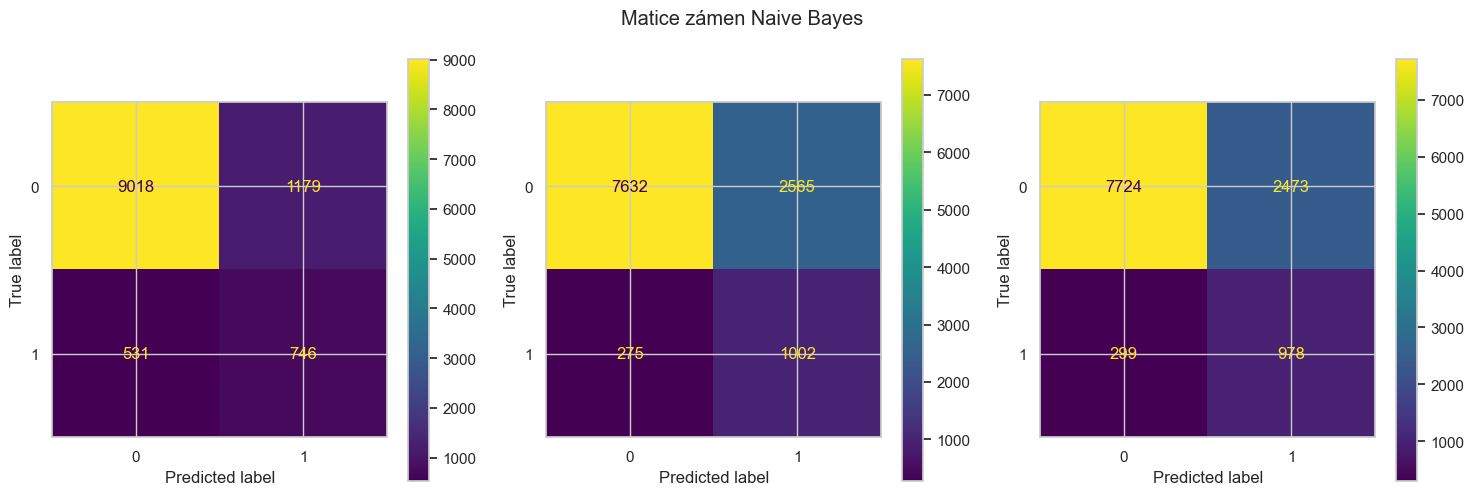

In [53]:
#Zobrazenie matic zámen pre jednotlivé modely Naive Bayes v grafickej podobe pomocou ConfusionMatrixDisplay.
fig,axes = plt.subplots(1,3,figsize=(15,5))

disp_1 = ConfusionMatrixDisplay(ct_bayes)
disp_1.plot(ax=axes[0], cmap="viridis")

disp_2 = ConfusionMatrixDisplay(ct_bayes_adasyn)
disp_2.plot(ax=axes[1], cmap="viridis")

disp_3 = ConfusionMatrixDisplay(ct_bayes_smote)
disp_3.plot(ax=axes[2], cmap="viridis")

fig.suptitle("Matice zámen Naive Bayes")
plt.tight_layout()
plt.show()



# kNN

[[9983  214]
 [1028  249]]
              precision    recall  f1-score   support

           0     0.9066    0.9790    0.9414     10197
           1     0.5378    0.1950    0.2862      1277

    accuracy                         0.8918     11474
   macro avg     0.7222    0.5870    0.6138     11474
weighted avg     0.8656    0.8918    0.8685     11474



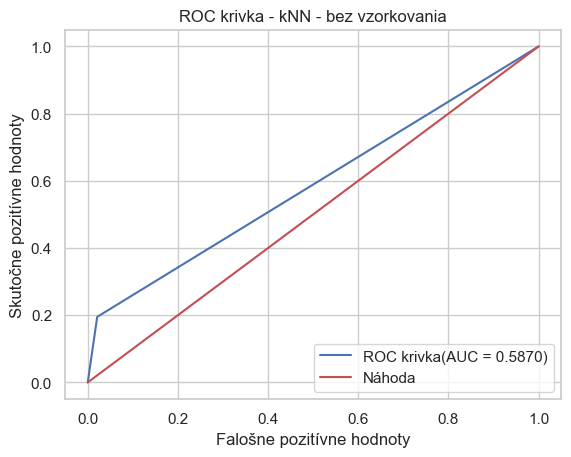

AUC: 0.5870008445218852


In [54]:
##kNN bez nad vzorkovania                                          
#Vytvorenie modelu knn pomocou kNeighborsClassifier funkcie, následné trénovanie modelu a vytvorenie nových klasifikácií.
model1a = KNeighborsClassifier()                          
fitaa = model1a.fit(train_data2, train_label2)                          
res1 = model1a.predict(test_data2)

#Vytvorenie a vypísanie matice zámen a classification reportu.
ct_knn = confusion_matrix(test_label2, res1) 
print(ct_knn)
print(classification_report(test_label2, res1,digits=4))

#Výpočet ROC krivky a AUC metriky.
fprba, tprba, threshold = roc_curve(test_label2, res1)
roc_aucba = auc(fprba, tprba)

#Grafický zobrazená ROC krivka a vypísaná AUC hodnota.
plt.figure()
plt.plot(fprba, tprba, color='b', label='ROC krivka(AUC = {:.4f})'.format(roc_aucba))
plt.plot([0, 1], [0, 1], color='r',label='Náhoda')
plt.xlabel('Falošne pozitívne hodnoty')
plt.ylabel('Skutočne pozitívne hodnoty')
plt.title('ROC krivka - kNN - bez vzorkovania')
plt.legend(loc='lower right')
plt.show()
print('AUC:', roc_aucba)

[[8496 1701]
 [ 491  786]]
              precision    recall  f1-score   support

           0     0.9454    0.8332    0.8857     10197
           1     0.3160    0.6155    0.4176      1277

    accuracy                         0.8090     11474
   macro avg     0.6307    0.7243    0.6517     11474
weighted avg     0.8753    0.8090    0.8336     11474



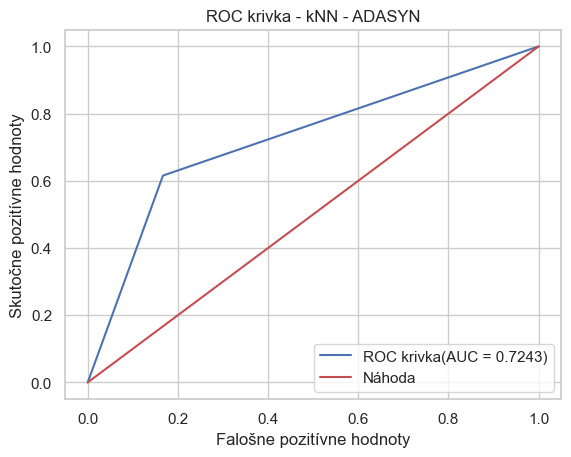

AUC: 0.7243456606496498


In [55]:
#KNN ADASYN
#Vytvorenie modelu knn pomocou kNeighborsClassifier funkcie, následné trénovanie modelu a vytvorenie nových klasifikácií.
model1b = KNeighborsClassifier()
fitab = model1b.fit(x_train_adasyn, y_train_adasyn)                          
res2 = model1b.predict(test_data2)

#Vytvorenie a vypísanie matice zámen a classification reportu.
ct_knn_adasyn = confusion_matrix(test_label2, res2)
print(ct_knn_adasyn)  
print(classification_report(test_label2, res2,digits=4))

# Výpočet ROC krivky
fprbb, tprbb, threshold = roc_curve(test_label2, res2)
roc_aucbb = auc(fprbb, tprbb)

# Vykreslenie ROC krivky
plt.figure()
plt.plot(fprbb, tprbb, color='b', label='ROC krivka(AUC = {:.4f})'.format(roc_aucbb))
plt.plot([0, 1], [0, 1], color='r',label='Náhoda')
plt.xlabel('Falošne pozitívne hodnoty')
plt.ylabel('Skutočne pozitívne hodnoty')
plt.title('ROC krivka - kNN - ADASYN')
plt.legend(loc='lower right')
plt.show()

# Výpis AUC hodnoty
print('AUC:', roc_aucbb)

[[8651 1546]
 [ 533  744]]
              precision    recall  f1-score   support

           0     0.9420    0.8484    0.8927     10197
           1     0.3249    0.5826    0.4172      1277

    accuracy                         0.8188     11474
   macro avg     0.6334    0.7155    0.6549     11474
weighted avg     0.8733    0.8188    0.8398     11474



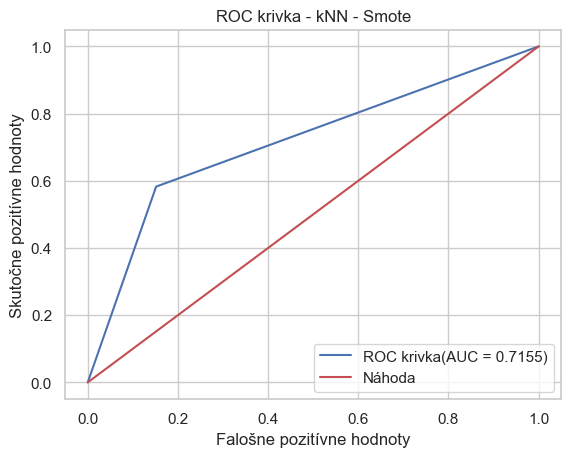

AUC: 0.715501142757835


In [56]:
##kNN SMOTE

model1c = KNeighborsClassifier()
fitac = model1c.fit(x_train_smote, y_train_smote)
res3 = model1c.predict(test_data2)

ct_knn_smote = confusion_matrix(test_label2, res3)
print(ct_knn_smote)  
print(classification_report(test_label2, res3,digits=4))

# Výpočet ROC krivky
fprbc, tprbc, threshold = roc_curve(test_label2, res3)
roc_aucbc = auc(fprbc, tprbc)

# Vykreslenie ROC krivky
plt.figure()
plt.plot(fprbc, tprbc, color='b', label='ROC krivka(AUC = {:.4f})'.format(roc_aucbc))
plt.plot([0, 1], [0, 1], color='r',label='Náhoda')
plt.xlabel('Falošne pozitívne hodnoty')
plt.ylabel('Skutočne pozitívne hodnoty')
plt.title('ROC krivka - kNN - Smote')
plt.legend(loc='lower right')
plt.show()

# Výpis AUC hodnoty
print('AUC:', roc_aucbc)

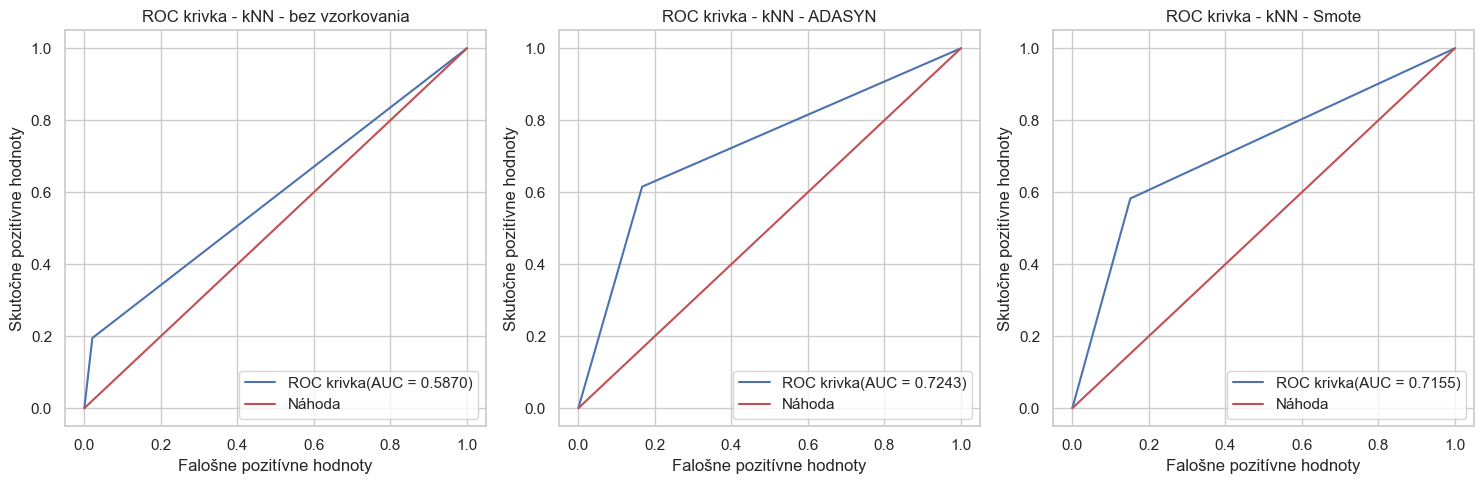

In [57]:
# Vytvorenie grafov ROC kriviek pre kNN modely s jednotlivými typmi nad vzorkovania. Atriibuty: fpraba,fprbb,frpbc predstavuju falošne pozitívne hodnoty pre jednotlivé modely a trba,trbb,trbc predstavuju skutočne pozitívne hodnoty pre jednotlivé modely.
plt.figure(figsize=(15, 5))
#Graf ROC krivky bez vzorkovania
plt.subplot(131)
plt.plot(fprba, tprba, color='b', label='ROC krivka(AUC = {:.4f})'.format(roc_aucba))
plt.plot([0, 1], [0, 1], color='r',label='Náhoda')
plt.xlabel('Falošne pozitívne hodnoty')
plt.ylabel('Skutočne pozitívne hodnoty')
plt.title('ROC krivka - kNN - bez vzorkovania')
plt.legend(loc='lower right')

#Graf ROC krivky modelu ADASYN
plt.subplot(132)
plt.plot(fprbb, tprbb, color='b', label='ROC krivka(AUC = {:.4f})'.format(roc_aucbb))
plt.plot([0, 1], [0, 1], color='r',label='Náhoda')
plt.xlabel('Falošne pozitívne hodnoty')
plt.ylabel('Skutočne pozitívne hodnoty')
plt.title('ROC krivka - kNN - ADASYN')
plt.legend(loc='lower right')

#Graf ROC krivky modelu SMOTE
plt.subplot(133)
plt.plot(fprbc, tprbc, color='b', label='ROC krivka(AUC = {:.4f})'.format(roc_aucbc))
plt.plot([0, 1], [0, 1], color='r',label='Náhoda')
plt.xlabel('Falošne pozitívne hodnoty')
plt.ylabel('Skutočne pozitívne hodnoty')
plt.title('ROC krivka - kNN - Smote')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

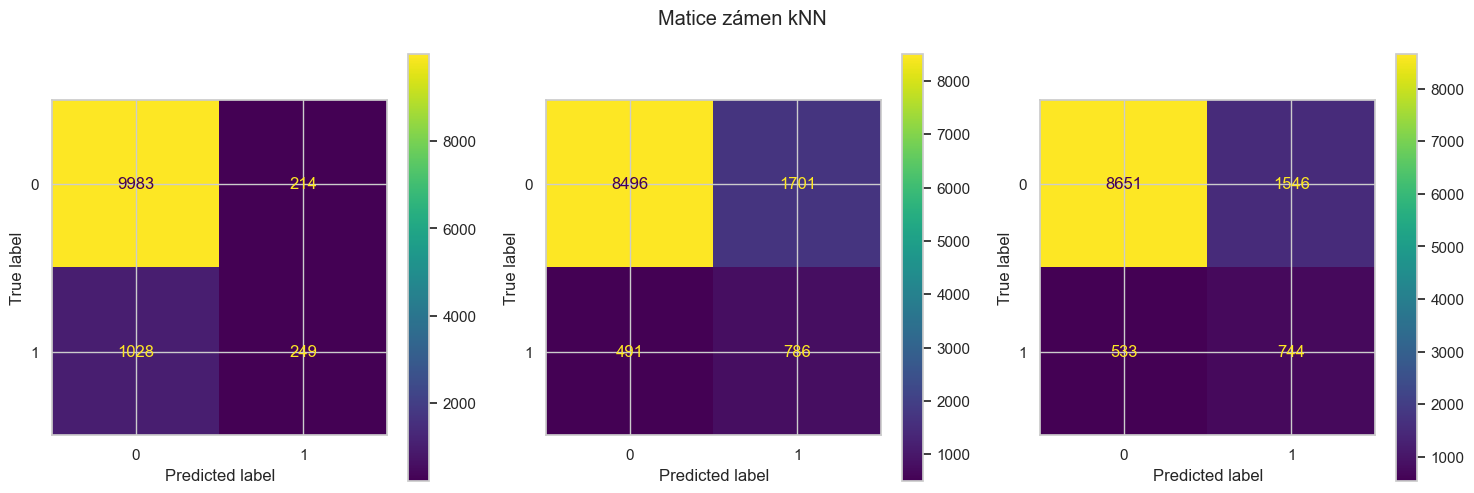

In [58]:
#Zobrazenie matic zámen pre jednotlivé modely kNN v grafickej podobe pomocou ConfusionMatrixDisplay.
fig,axes = plt.subplots(1,3,figsize=(15,5))

disp_1 = ConfusionMatrixDisplay(ct_knn)
disp_1.plot(ax=axes[0], cmap="viridis", values_format="d")

disp_2 = ConfusionMatrixDisplay(ct_knn_adasyn)
disp_2.plot(ax=axes[1], cmap="viridis")

disp_3 = ConfusionMatrixDisplay(ct_knn_smote)
disp_3.plot(ax=axes[2], cmap="viridis")

fig.suptitle("Matice zámen kNN")
plt.tight_layout()
plt.show()

# RF

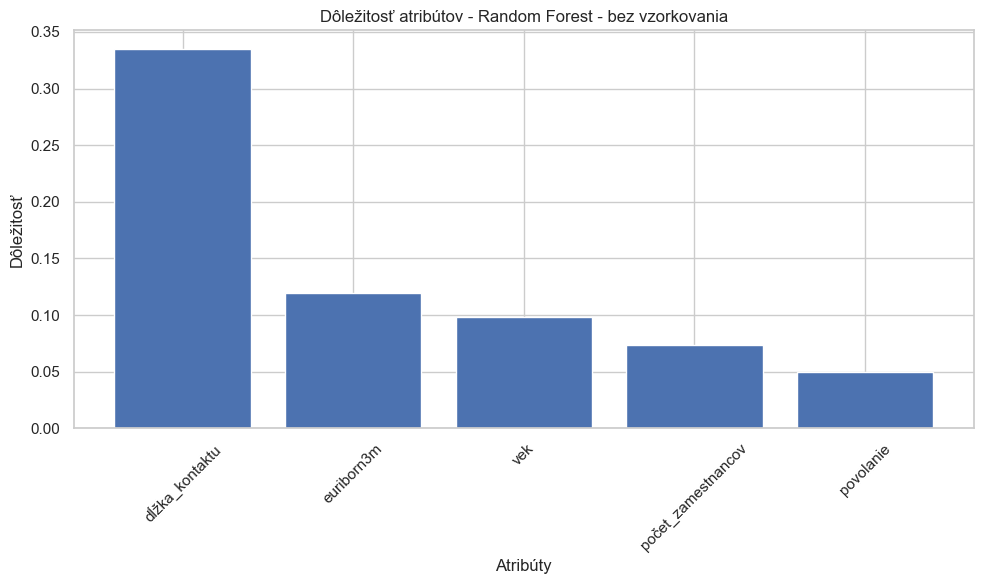

[[9858  339]
 [ 621  656]]
              precision    recall  f1-score   support

           0     0.9407    0.9668    0.9536     10197
           1     0.6593    0.5137    0.5775      1277

    accuracy                         0.9163     11474
   macro avg     0.8000    0.7402    0.7655     11474
weighted avg     0.9094    0.9163    0.9117     11474



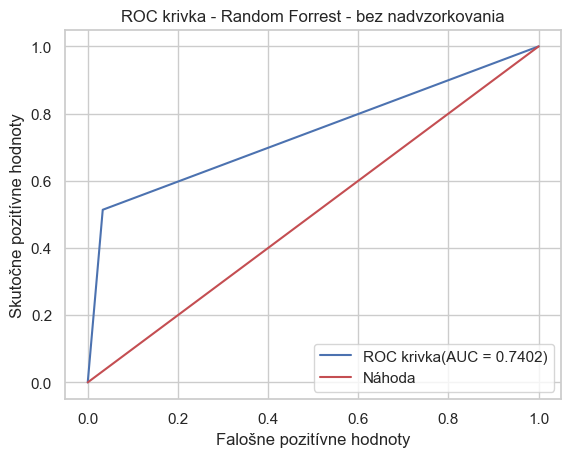

AUC: 0.7402294608276467


In [59]:
##Random Forrest bez vzorkovania
#Vytvorenie modelu Random forest pomocou funkcie RandomForestClassifier, natrénovanie modelu a vytvorenie novej klasifikácie do premennej pred. Parameter random_state pre dosahovanie reprodukovateľných výsledkov.
model_rfA = RandomForestClassifier(random_state=0)
model_rfA.fit(train_data2, train_label2)
pred = model_rfA.predict(test_data2)

#Získanie 5 najdôležitejších atribútov pri trénovaní daného modelu a zobrezenie týchto atribútov na grafe.
importances_rfA = model_rfA.feature_importances_
sorted_indicesA = importances_rfA.argsort()[::-1]
top_feature_indicesA = sorted_indicesA[:5]
top_feature_namesA = [train_data2.columns[i] for i in top_feature_indicesA]
#Zobrazenie najdôležitejších atribútov na grafe.
plt.figure(figsize=(10, 6))
plt.bar(top_feature_namesA, importances_rfA[top_feature_indicesA])
plt.xlabel("Atribúty")
plt.ylabel("Dôležitosť")
plt.title("Dôležitosť atribútov - Random Forest - bez vzorkovania")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Vytvorenie a vypísanie matice zámen s classification reportu
ct_rf = confusion_matrix(test_label2, pred)
print(ct_rf)  
print(classification_report(test_label2, pred,digits=4))

#Výpočet ROC krivky a AUC hodnoty
fprca, tprca, threshold = roc_curve(test_label2, pred)
roc_aucca = auc(fprca, tprca)

#Vykreslenie ROC krivky a vypísanie AUC hodnoty
plt.figure()
plt.plot(fprca, tprca, color='b', label='ROC krivka(AUC = {:.4f})'.format(roc_aucca))
plt.plot([0, 1], [0, 1], color='r',label='Náhoda')
plt.xlabel('Falošne pozitívne hodnoty')
plt.ylabel('Skutočne pozitívne hodnoty')
plt.title('ROC krivka - Random Forrest - bez nadvzorkovania')
plt.legend(loc='lower right')
plt.show()
print('AUC:', roc_aucca)

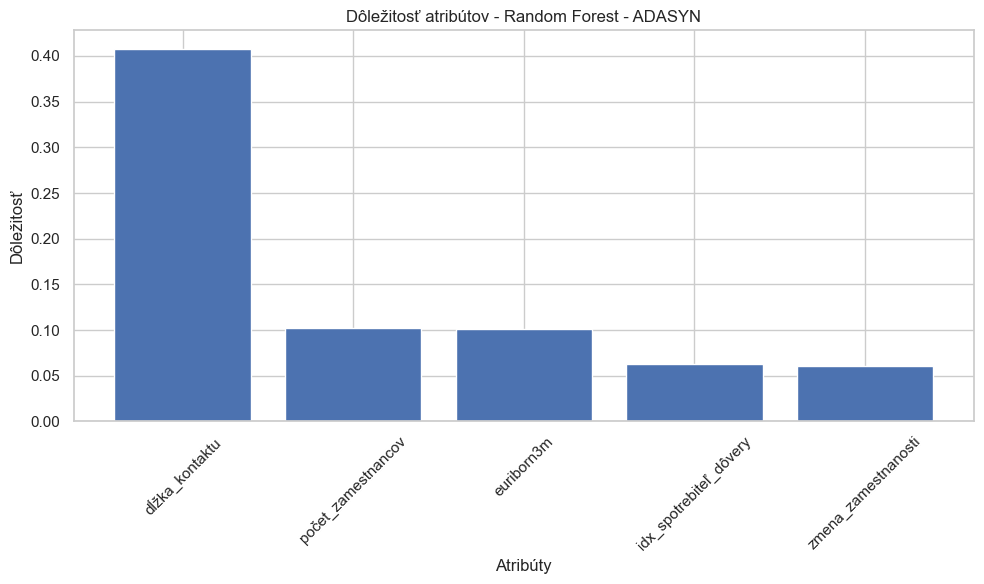

[[9622  575]
 [ 457  820]]
              precision    recall  f1-score   support

           0     0.9547    0.9436    0.9491     10197
           1     0.5878    0.6421    0.6138      1277

    accuracy                         0.9101     11474
   macro avg     0.7712    0.7929    0.7814     11474
weighted avg     0.9138    0.9101    0.9118     11474



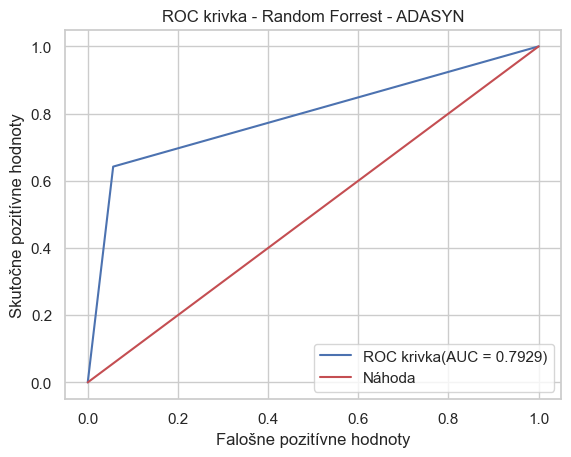

AUC: 0.7928704290550548


In [60]:
##Random Forrest adasyn
#Vytvorenie modelu Random forest pomocou funkcie RandomForestClassifier, natrénovanie modelu a vytvorenie novej klasifikácie do premennej pred2. Parameter random_state pre dosahovanie reprodukovateľných výsledkov.
model_rfB = RandomForestClassifier(random_state=0)
model_rfB.fit(x_train_adasyn, y_train_adasyn)
pred2 = model_rfB.predict(test_data2)

#Získanie 5 najdôležitejších atribútov pri trénovaní daného modelu a zobrezenie týchto atribútov na grafe.
importances_rfB = model_rfB.feature_importances_
sorted_indicesB = importances_rfB.argsort()[::-1]
top_feature_indicesB = sorted_indicesB[:5]
top_feature_namesB = [x_train_adasyn.columns[i] for i in top_feature_indicesB]
#Vytvorenie grafu najdôležitejších atribútov.
plt.figure(figsize=(10, 6))
plt.bar(top_feature_namesB, importances_rfB[top_feature_indicesB])
plt.xlabel("Atribúty")
plt.ylabel("Dôležitosť")
plt.title("Dôležitosť atribútov - Random Forest - ADASYN")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Vytvorenie a vypísanie matice zámen a classification reportu.
ct_rf_adasyn = confusion_matrix(test_label2, pred2)
print(ct_rf_adasyn)
print(classification_report(test_label2, pred2,digits=4))

#Vypočítanie ROC krivky a AUC metriky.
fprcb, tprcb, threshold = roc_curve(test_label2, pred2)
roc_auccb = auc(fprcb, tprcb)

#Vykreslenie ROC krivky a vypísanie AUC metriky.
plt.figure()
plt.plot(fprcb, tprcb, color='b', label='ROC krivka(AUC = {:.4f})'.format(roc_auccb))
plt.plot([0, 1], [0, 1], color='r',label='Náhoda')
plt.xlabel('Falošne pozitívne hodnoty')
plt.ylabel('Skutočne pozitívne hodnoty')
plt.title('ROC krivka - Random Forrest - ADASYN')
plt.legend(loc='lower right')
plt.show()
print('AUC:', roc_auccb)

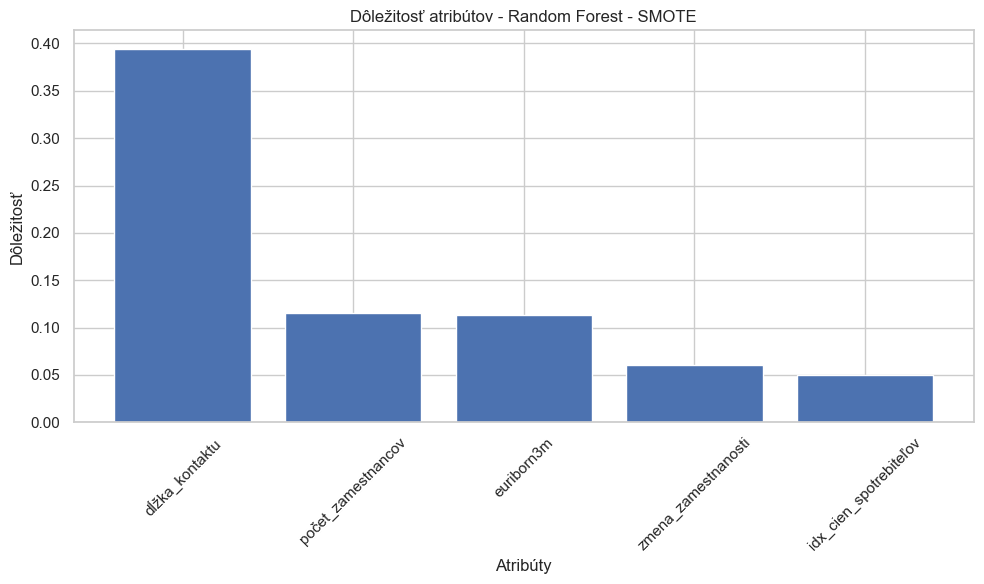

[[9633  564]
 [ 456  821]]
              precision    recall  f1-score   support

           0     0.9548    0.9447    0.9497     10197
           1     0.5928    0.6429    0.6168      1277

    accuracy                         0.9111     11474
   macro avg     0.7738    0.7938    0.7833     11474
weighted avg     0.9145    0.9111    0.9127     11474



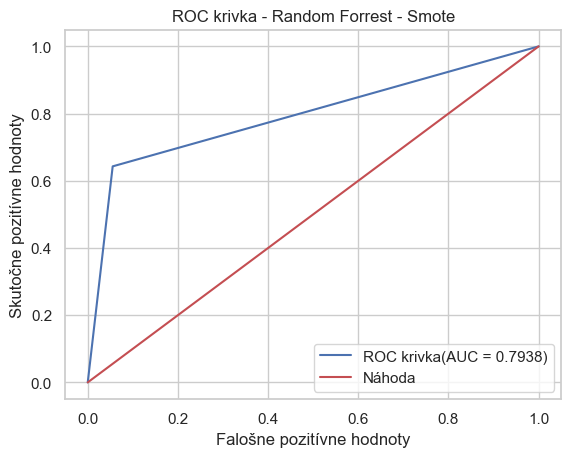

AUC: 0.7938013460589887


In [61]:
##Random Forrest smote
#Vytvorenie modelu Random forest pomocou funkcie RandomForestClassifier, natrénovanie modelu a vytvorenie novej klasifikácie do premennej pred3. Parameter random_state pre dosahovanie reprodukovateľných výsledkov.
model_rfC = RandomForestClassifier(random_state=0)
model_rfC.fit(x_train_smote, y_train_smote)
pred3 = model_rfC.predict(test_data2)

#Získanie 5 najdôležitejších atribútov pri trénovaní daného modelu a zobrezenie týchto atribútov na grafe.
importances_rfC = model_rfC.feature_importances_
sorted_indicesC = importances_rfC.argsort()[::-1]
top_feature_indicesC = sorted_indicesC[:5]
top_feature_namesC = [x_train_smote.columns[i] for i in top_feature_indicesC]
#Vytvorenie grafu najdôležitejších atribútov.
plt.figure(figsize=(10, 6))
plt.bar(top_feature_namesC, importances_rfC[top_feature_indicesC])
plt.xlabel("Atribúty")
plt.ylabel("Dôležitosť")
plt.title("Dôležitosť atribútov - Random Forest - SMOTE")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Vytvorenie a vypísanie matice zámen a classification reportu.
ct_rf_smote = confusion_matrix(test_label2, pred3)
print(ct_rf_smote)
print(classification_report(test_label2, pred3,digits=4))

#Vypočítanie ROC krivky a AUC metriky.
fprcc, tprcc, threshold = roc_curve(test_label2, pred3)
roc_auccc = auc(fprcc, tprcc)

#Vykreslenie ROC krivky a vypísanie AUC metriky.
plt.figure()
plt.plot(fprcc, tprcc, color='b', label='ROC krivka(AUC = {:.4f})'.format(roc_auccc))
plt.plot([0, 1], [0, 1], color='r',label='Náhoda')
plt.xlabel('Falošne pozitívne hodnoty')
plt.ylabel('Skutočne pozitívne hodnoty')
plt.title('ROC krivka - Random Forrest - Smote')
plt.legend(loc='lower right')
plt.show()
# Výpis AUC hodnoty
print('AUC:', roc_auccc)

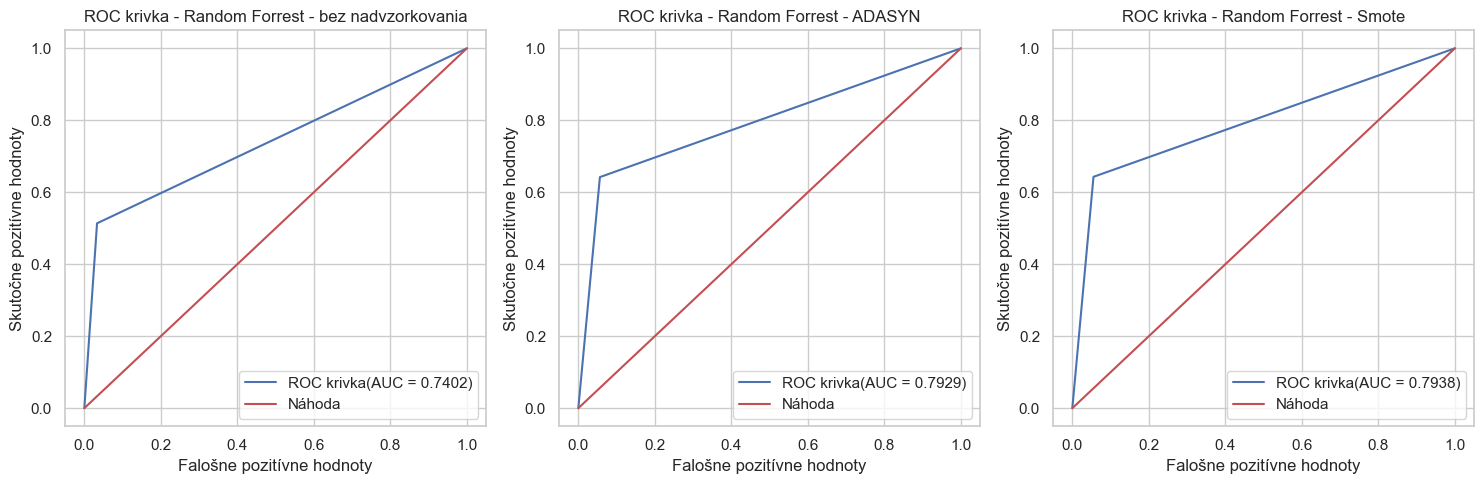

In [62]:
# Vytvorenie grafov ROC kriviek pre kNN modely s jednotlivými typmi nad vzorkovania. Atriibuty: fprca,fprcb,frpcc predstavuju falošne pozitívne hodnoty pre jednotlivé modely a trca,trcb,trcc predstavuju skutočne pozitívne hodnoty pre jednotlivé modely.
plt.figure(figsize=(15, 5))
#Graf ROC krivky bez vzorkovania
plt.subplot(131)
plt.plot(fprca, tprca, color='b', label='ROC krivka(AUC = {:.4f})'.format(roc_aucca))
plt.plot([0, 1], [0, 1], color='r',label='Náhoda')
plt.xlabel('Falošne pozitívne hodnoty')
plt.ylabel('Skutočne pozitívne hodnoty')
plt.title('ROC krivka - Random Forrest - bez nadvzorkovania')
plt.legend(loc='lower right')

#Graf ROC krivky modelu ADASYN
plt.subplot(132)
plt.plot(fprcb, tprcb, color='b', label='ROC krivka(AUC = {:.4f})'.format(roc_auccb))
plt.plot([0, 1], [0, 1], color='r',label='Náhoda')
plt.xlabel('Falošne pozitívne hodnoty')
plt.ylabel('Skutočne pozitívne hodnoty')
plt.title('ROC krivka - Random Forrest - ADASYN')
plt.legend(loc='lower right')

#Graf ROC krivky modelu SMOTE
plt.subplot(133)
plt.plot(fprcc, tprcc, color='b', label='ROC krivka(AUC = {:.4f})'.format(roc_auccc))
plt.plot([0, 1], [0, 1], color='r',label='Náhoda')
plt.xlabel('Falošne pozitívne hodnoty')
plt.ylabel('Skutočne pozitívne hodnoty')
plt.title('ROC krivka - Random Forrest - Smote')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

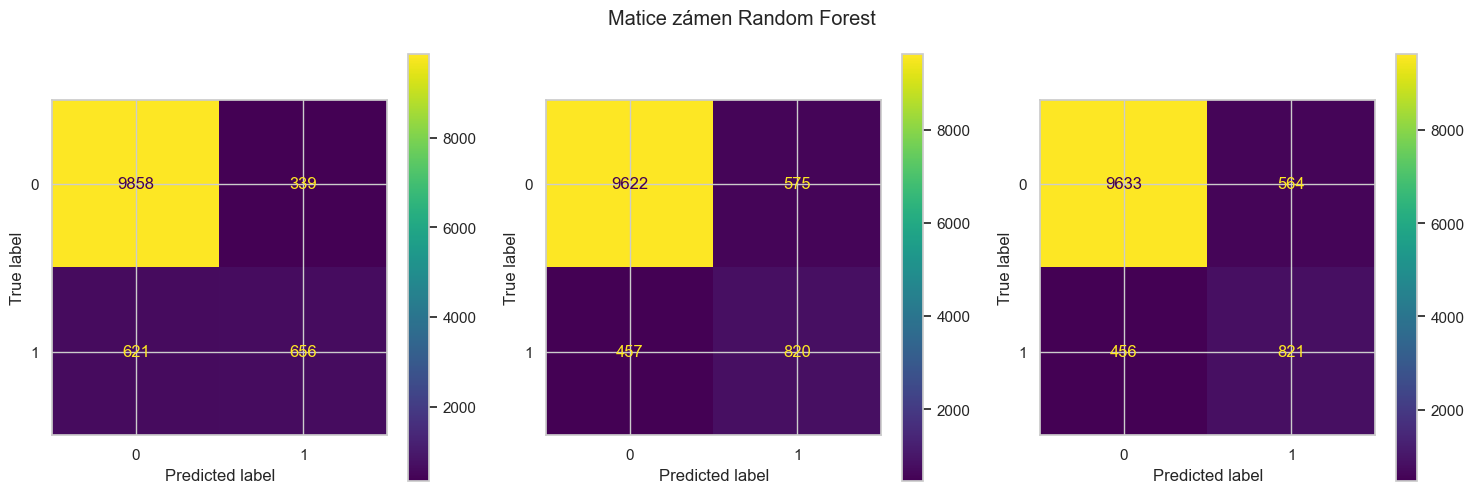

In [63]:
#Zobrazenie matic zámen pre jednotlivé modely Random Forest v grafickej podobe pomocou ConfusionMatrixDisplay.
fig,axes = plt.subplots(1,3,figsize=(15,5))

disp_1 = ConfusionMatrixDisplay(ct_rf)
disp_1.plot(ax=axes[0], cmap="viridis", values_format="d")

disp_2 = ConfusionMatrixDisplay(ct_rf_adasyn)
disp_2.plot(ax=axes[1], cmap="viridis")

disp_3 = ConfusionMatrixDisplay(ct_rf_smote)
disp_3.plot(ax=axes[2], cmap="viridis")

fig.suptitle("Matice zámen Random Forest")
plt.tight_layout()
plt.show()

# DT

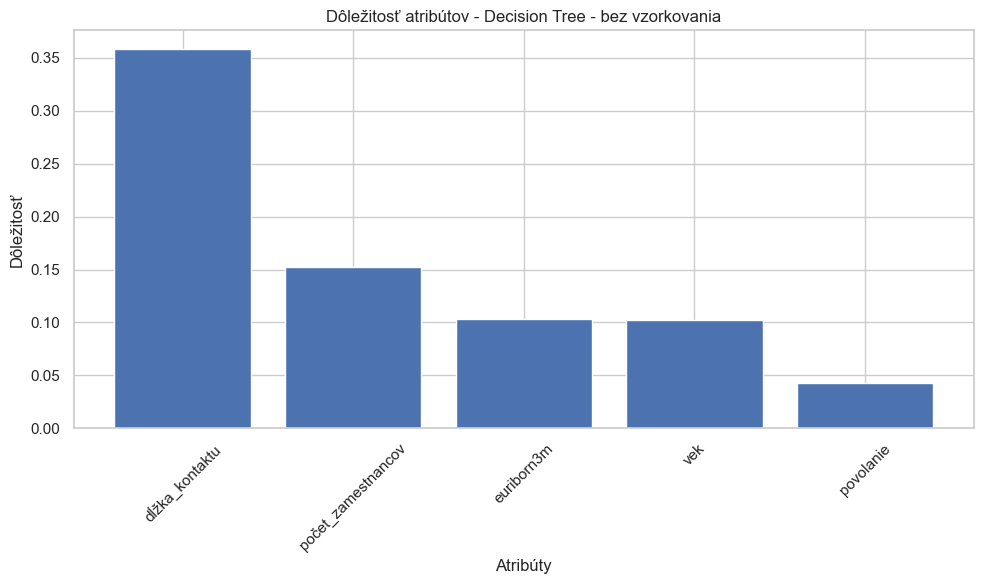

[[9594  603]
 [ 569  708]]
              precision    recall  f1-score   support

           0     0.9440    0.9409    0.9424     10197
           1     0.5400    0.5544    0.5471      1277

    accuracy                         0.8979     11474
   macro avg     0.7420    0.7476    0.7448     11474
weighted avg     0.8991    0.8979    0.8984     11474



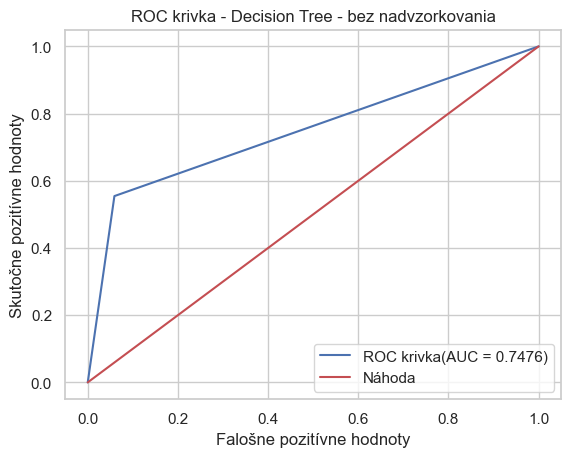

AUC: 0.7476446962727763


In [64]:
##Decision Tree bez nad vzorkovanie
#Vytvorenie modelu pomocou funkcie DecisionTreeClassifier s následovným trénovaním modelu a novou klasifikáciou cieľového atribútu. Opätovné využitie parametra random_state pre reprodukovateľnosť výsledkov.
model_DTA = DecisionTreeClassifier(random_state=0)
model_DTA = model_DTA.fit(train_data2, train_label2)
result = model_DTA.predict(test_data2)

#Získanie 5 najdôležitejších atribútov pri trénovaní modelu a následné grafické zobrazenie modelu.
importances_dtAA = model_DTA.feature_importances_
sorted_indicesAA = importances_dtAA.argsort()[::-1]
top_feature_indicesAA = sorted_indicesAA[:5]
top_feature_namesAA = [train_data2.columns[i] for i in top_feature_indicesAA]
#Grafické zobrazenie najdôležitejších atribútov.
plt.figure(figsize=(10, 6))
plt.bar(top_feature_namesAA, importances_dtAA[top_feature_indicesAA])
plt.xlabel("Atribúty")
plt.ylabel("Dôležitosť")
plt.title("Dôležitosť atribútov - Decision Tree - bez vzorkovania")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Vytvorenie a vypísanie matice zámen a classification reportu.
ct_dt = confusion_matrix(test_label2, result)
print(ct_dt)
print(classification_report(test_label2, result, digits=4))


#Výpočet ROC krivky a AUC metriky.
fprda, tprda, threshold = roc_curve(test_label2, result)
roc_aucda = auc(fprda, tprda)
#Grafické zobrazenie ROC krivky a vypísanie AUC hodnoty
plt.figure()
plt.plot(fprda, tprda, color='b', label='ROC krivka(AUC = {:.4f})'.format(roc_aucda))
plt.plot([0, 1], [0, 1], color='r',label='Náhoda')
plt.xlabel('Falošne pozitívne hodnoty')
plt.ylabel('Skutočne pozitívne hodnoty')
plt.title('ROC krivka - Decision Tree - bez nadvzorkovania')
plt.legend(loc='lower right')
plt.show()
print('AUC:', roc_aucda)

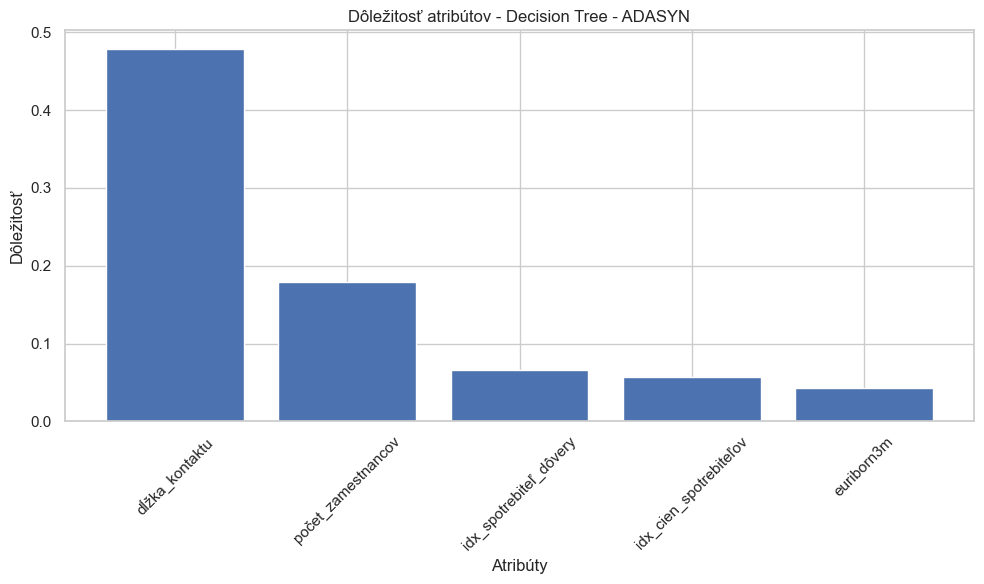

[[9410  787]
 [ 532  745]]
              precision    recall  f1-score   support

           0     0.9465    0.9228    0.9345     10197
           1     0.4863    0.5834    0.5304      1277

    accuracy                         0.8850     11474
   macro avg     0.7164    0.7531    0.7325     11474
weighted avg     0.8953    0.8850    0.8895     11474



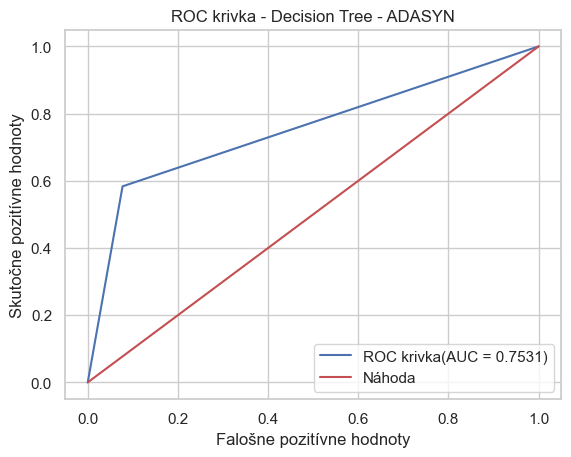

AUC: 0.7531095139149515


In [65]:
##Decision Tree nad vzorkvoanie ADASYN
#Vytvorenie modelu pomocou funkcie DecisionTreeClassifier s následovným trénovaním modelu a novou klasifikáciou cieľového atribútu. Opätovné využitie parametra random_state pre reprodukovateľnosť výsledkov.
model_DTB = DecisionTreeClassifier(random_state=0)
model_DTB = model_DTB.fit(x_train_adasyn, y_train_adasyn)
result2 = model_DTB.predict(test_data2)

#Získanie 5 najdôležitejších atribútov a následné grafické zobrazenie týchto atribútov.
importances_dtBB = model_DTB.feature_importances_
sorted_indicesBB = importances_dtBB.argsort()[::-1]
top_feature_indicesBB = sorted_indicesBB[:5]
top_feature_namesBB = [x_train_adasyn.columns[i] for i in top_feature_indicesBB]
#Grafické zobrazenie najdôležitejších atribútov.
plt.figure(figsize=(10, 6))
plt.bar(top_feature_namesBB, importances_dtBB[top_feature_indicesBB])
plt.xlabel("Atribúty")
plt.ylabel("Dôležitosť")
plt.title("Dôležitosť atribútov - Decision Tree - ADASYN")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Vytvorenie a vypísanie matice zámen a classification reportu.
ct_dt_adasyn = confusion_matrix(test_label2, result2)
print(ct_dt_adasyn)
print(classification_report(test_label2, result2, digits=4))

#Vypočítanie ROC krivky a AUC metriky a následné grafické zobrazenie ROC krivky a vypísanie AUC metriky.
fprdb, tprdb, threshold = roc_curve(test_label2, result2)
roc_aucdb = auc(fprdb, tprdb)

#Vykreslenie ROC krivky a vyísanie AUC hodnoty.
plt.figure()
plt.plot(fprdb, tprdb, color='b', label='ROC krivka(AUC = {:.4f})'.format(roc_aucdb))
plt.plot([0, 1], [0, 1], color='r',label='Náhoda')
plt.xlabel('Falošne pozitívne hodnoty')
plt.ylabel('Skutočne pozitívne hodnoty')
plt.title('ROC krivka - Decision Tree - ADASYN')
plt.legend(loc='lower right')
plt.show()
print('AUC:', roc_aucdb)


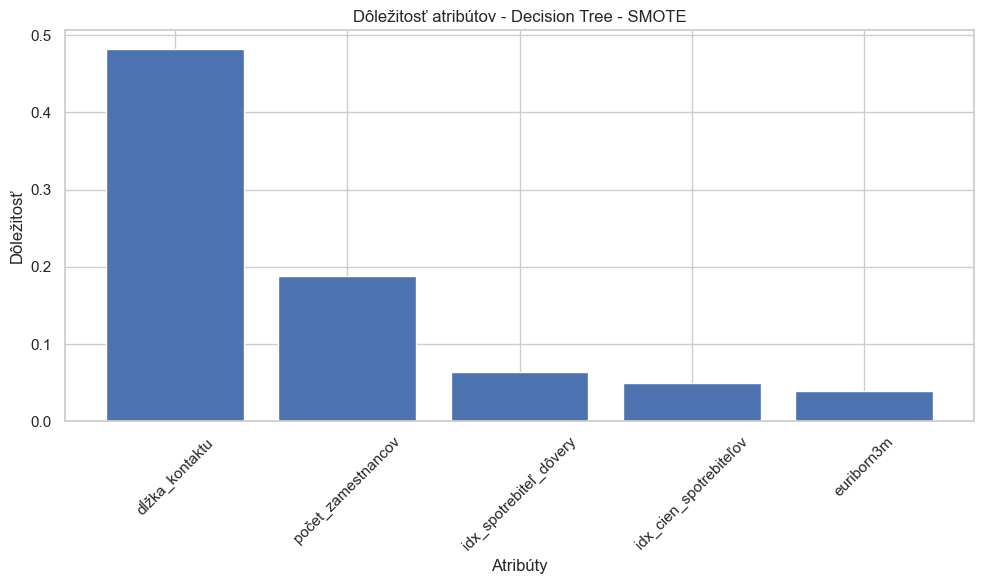

[[9492  705]
 [ 562  715]]
              precision    recall  f1-score   support

           0     0.9441    0.9309    0.9374     10197
           1     0.5035    0.5599    0.5302      1277

    accuracy                         0.8896     11474
   macro avg     0.7238    0.7454    0.7338     11474
weighted avg     0.8951    0.8896    0.8921     11474



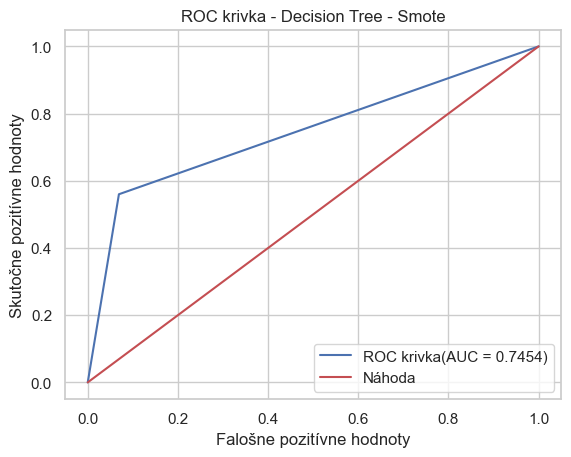

AUC: 0.7453840239989513


In [66]:
##Decision Tree nad vzorkovanie SMOTE.
#Vytvorenie modelu pomocou funkcie DecisionTreeClassifier s následovným trénovaním modelu a novou klasifikáciou cieľového atribútu. Opätovné využitie parametra random_state pre reprodukovateľnosť výsledkov.
model_DTC = DecisionTreeClassifier(random_state=0)
model_DTC = model_DTC.fit(x_train_smote, y_train_smote)
result3 = model_DTC.predict(test_data2)

#Získanie 5 najdôležitejších atribútov a následné grafické zobrazenie týchto atribútov.
importances_dtCC = model_DTC.feature_importances_
sorted_indicesCC = importances_dtCC.argsort()[::-1]
top_feature_indicesCC = sorted_indicesCC[:5]
top_feature_namesCC = [x_train_smote.columns[i] for i in top_feature_indicesCC]
#Grafické zobrazenie najdôležitejších atribútov.
plt.figure(figsize=(10, 6))
plt.bar(top_feature_namesCC, importances_dtCC[top_feature_indicesCC])
plt.xlabel("Atribúty")
plt.ylabel("Dôležitosť")
plt.title("Dôležitosť atribútov - Decision Tree - SMOTE")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Vytvorenie a vypísanie matice zámen a classification reportu.
ct_dt_smote = confusion_matrix(test_label2, result3)
print(ct_dt_smote)
print(classification_report(test_label2, result3,digits=4))

#Vypočítanie ROC krivky a AUC metriky a následné grafické zobrazenie ROC krivky a vypísanie AUC metriky.
fprdc, tprdc, threshold = roc_curve(test_label2, result3)
roc_aucdc = auc(fprdc, tprdc)

#Vykreslenie ROC krivky a vyísanie AUC hodnoty.
plt.figure()
plt.plot(fprdc, tprdc, color='b', label='ROC krivka(AUC = {:.4f})'.format(roc_aucdc))
plt.plot([0, 1], [0, 1], color='r',label='Náhoda')
plt.xlabel('Falošne pozitívne hodnoty')
plt.ylabel('Skutočne pozitívne hodnoty')
plt.title('ROC krivka - Decision Tree - Smote')
plt.legend(loc='lower right')
plt.show()
print('AUC:', roc_aucdc)

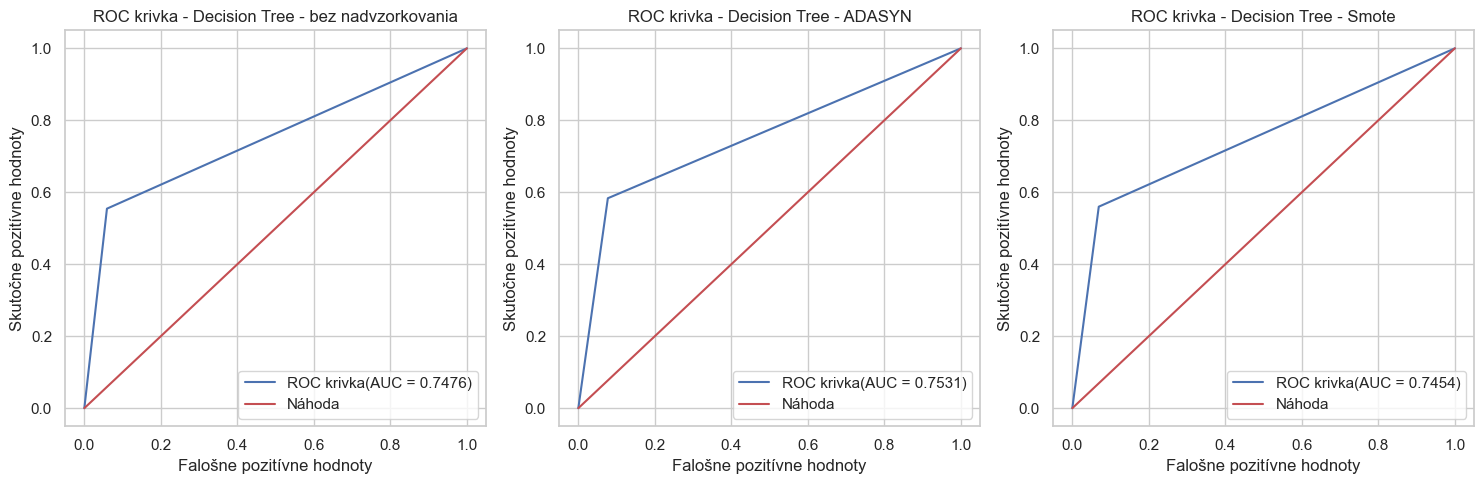

In [67]:
# Vytvorenie grafov ROC kriviek pre Decision Tree modely s jednotlivými typmi nad vzorkovania. Atriibuty: fprda,fprdb,frpdc predstavuju falošne pozitívne hodnoty pre jednotlivé modely a trda,trdb,trdc predstavuju skutočne pozitívne hodnoty pre jednotlivé modely.
plt.figure(figsize=(15, 5))
#Graf ROC krivky bez vzorkovania
plt.subplot(131)
plt.plot(fprda, tprda, color='b', label='ROC krivka(AUC = {:.4f})'.format(roc_aucda))
plt.plot([0, 1], [0, 1], color='r',label='Náhoda')
plt.xlabel('Falošne pozitívne hodnoty')
plt.ylabel('Skutočne pozitívne hodnoty')
plt.title('ROC krivka - Decision Tree - bez nadvzorkovania')
plt.legend(loc='lower right')

#Graf ROC krivky s nad vzorkovaním ADASYN
plt.subplot(132)
plt.plot(fprdb, tprdb, color='b', label='ROC krivka(AUC = {:.4f})'.format(roc_aucdb))
plt.plot([0, 1], [0, 1], color='r',label='Náhoda')
plt.xlabel('Falošne pozitívne hodnoty')
plt.ylabel('Skutočne pozitívne hodnoty')
plt.title('ROC krivka - Decision Tree - ADASYN')
plt.legend(loc='lower right')

#Graf ROC krivky s nad vzorkovaním SMOTE
plt.subplot(133)
plt.plot(fprdc, tprdc, color='b', label='ROC krivka(AUC = {:.4f})'.format(roc_aucdc))
plt.plot([0, 1], [0, 1], color='r',label='Náhoda')
plt.xlabel('Falošne pozitívne hodnoty')
plt.ylabel('Skutočne pozitívne hodnoty')
plt.title('ROC krivka - Decision Tree - Smote')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

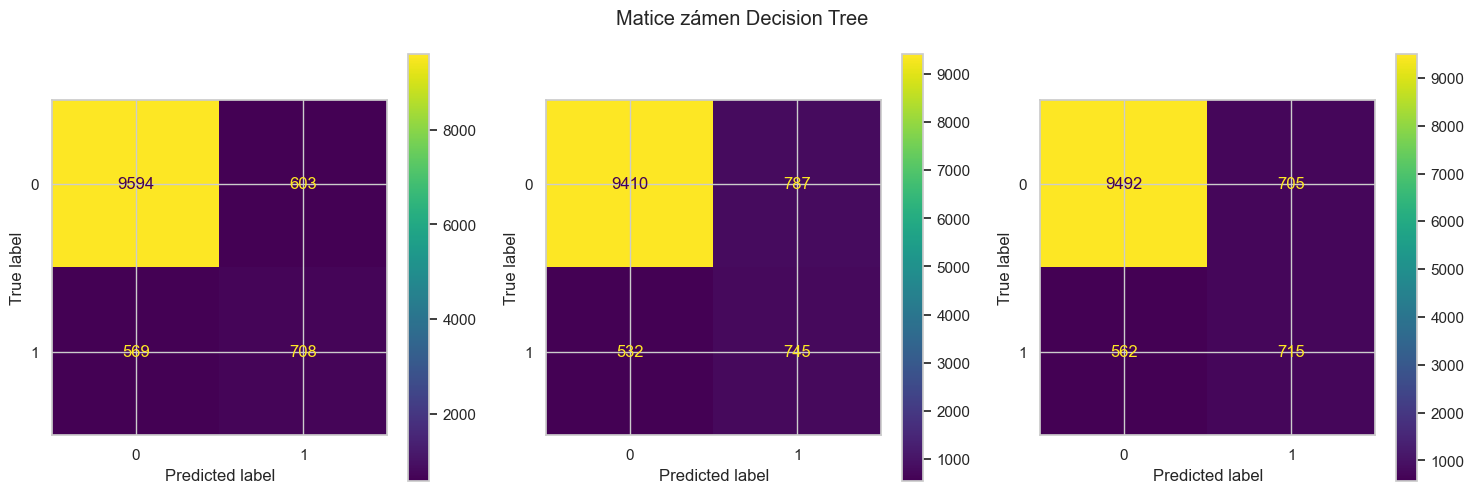

In [68]:
#Zobrazenie matic zámen pre jednotlivé modely Decision Tree v grafickej podobe pomocou ConfusionMatrixDisplay.
fig,axes = plt.subplots(1,3,figsize=(15,5))

disp_1 = ConfusionMatrixDisplay(ct_dt)
disp_1.plot(ax=axes[0], cmap="viridis", values_format="d")

disp_2 = ConfusionMatrixDisplay(ct_dt_adasyn)
disp_2.plot(ax=axes[1], cmap="viridis")

disp_3 = ConfusionMatrixDisplay(ct_dt_smote)
disp_3.plot(ax=axes[2], cmap="viridis")

fig.suptitle("Matice zámen Decision Tree")
plt.tight_layout()
plt.show()

# SVM

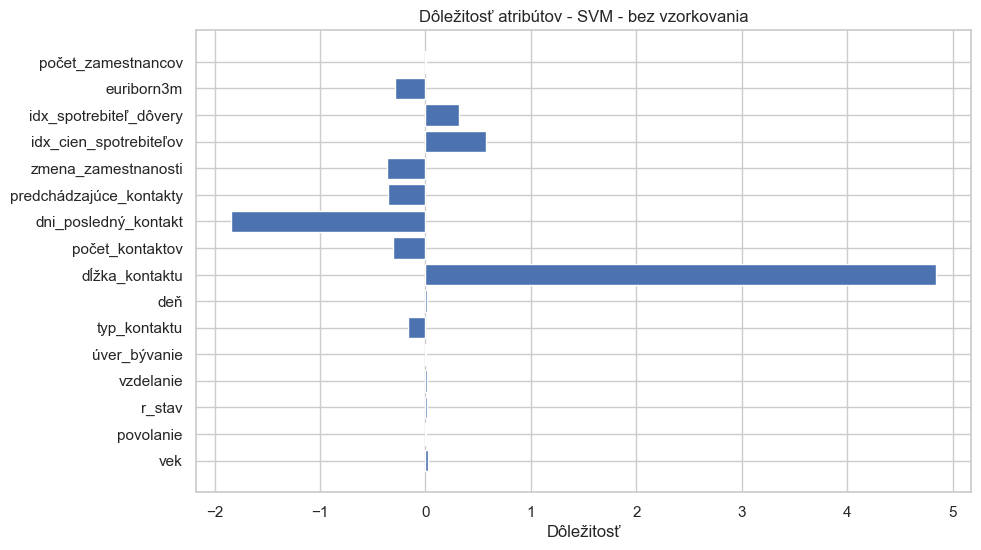

[[10013   184]
 [  978   299]]
              precision    recall  f1-score   support

           0     0.9110    0.9820    0.9452     10197
           1     0.6190    0.2341    0.3398      1277

    accuracy                         0.8987     11474
   macro avg     0.7650    0.6080    0.6425     11474
weighted avg     0.8785    0.8987    0.8778     11474



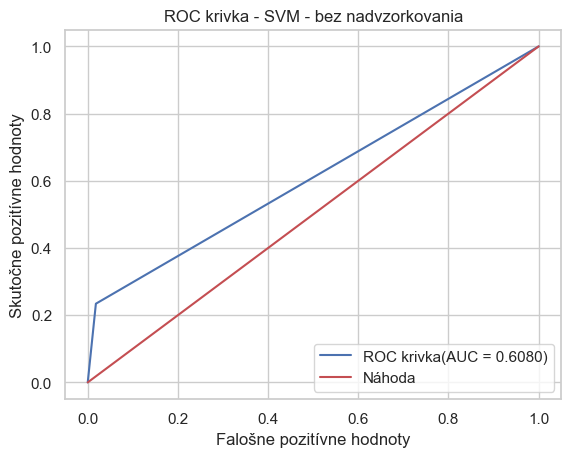

AUC: 0.6080489993179777


In [69]:
#SVM bez nad vzorkovania
#Vytvorenie modelu SVM s následným trénovaním na trénovacích dátach a vytvorenie novej klasifikácie. Parameter karnel sme zvolili lineár. Random state parameter zvoleny 9 pre lepšiu reprodukovateľnosť výsledkov.
model_SVMA = SVC(kernel='linear',random_state=0)
model_SVMA = model_SVMA.fit(train_data2, train_label2)
result = model_SVMA.predict(test_data2)

#Nájdenie dôležitých atribútov a ich následné vypísanie
importances_svmAA = model_SVMA.coef_[0]
feature_namesAA = train_data2.columns
#Grafické zobrazenie dôležitých atribútov.
plt.figure(figsize=(10, 6))
plt.barh(feature_namesAA, importances_svmAA)
plt.xlabel("Dôležitosť")
plt.title("Dôležitosť atribútov - SVM - bez vzorkovania")
plt.show()

#Vytvorenie a vypísanie matice zámen a classification reportu.
ct_svm = confusion_matrix(test_label2, result)
print(ct_svm)
print(classification_report(test_label2, result,digits=4))

#Výpočet ROC krivky a AUC metriky.
fprea, tprea, threshold = roc_curve(test_label2, result)
roc_aucea = auc(fprea, tprea)
#Grafické zobrazenie ROC krivky a vypísanie AUC hodnoty
plt.figure()
plt.plot(fprea, tprea, color='b', label='ROC krivka(AUC = {:.4f})'.format(roc_aucea))
plt.plot([0, 1], [0, 1], color='r',label='Náhoda')
plt.xlabel('Falošne pozitívne hodnoty')
plt.ylabel('Skutočne pozitívne hodnoty')
plt.title('ROC krivka - SVM - bez nadvzorkovania')
plt.legend(loc='lower right')
plt.show()
print('AUC:', roc_aucea)

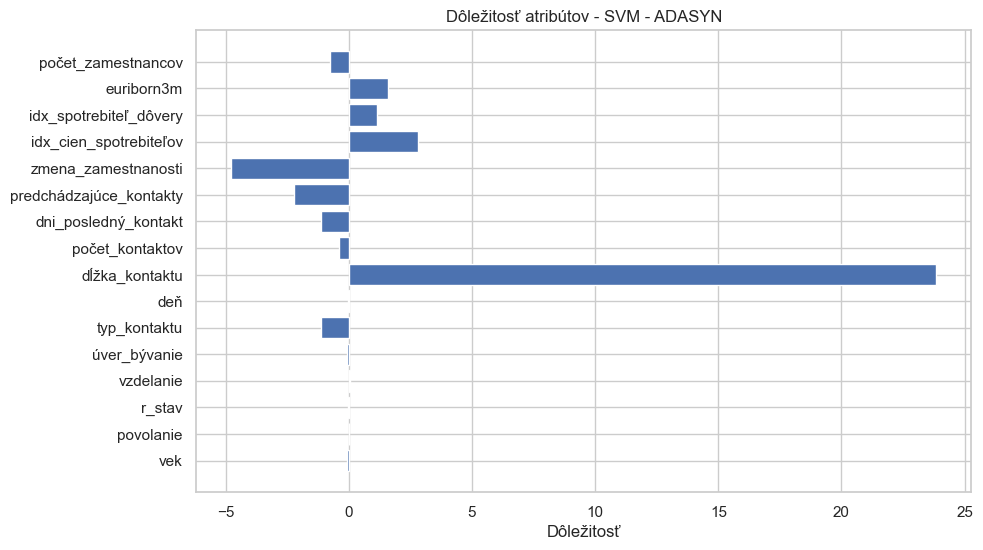

[[8692 1505]
 [ 161 1116]]
              precision    recall  f1-score   support

           0     0.9818    0.8524    0.9125     10197
           1     0.4258    0.8739    0.5726      1277

    accuracy                         0.8548     11474
   macro avg     0.7038    0.8632    0.7426     11474
weighted avg     0.9199    0.8548    0.8747     11474



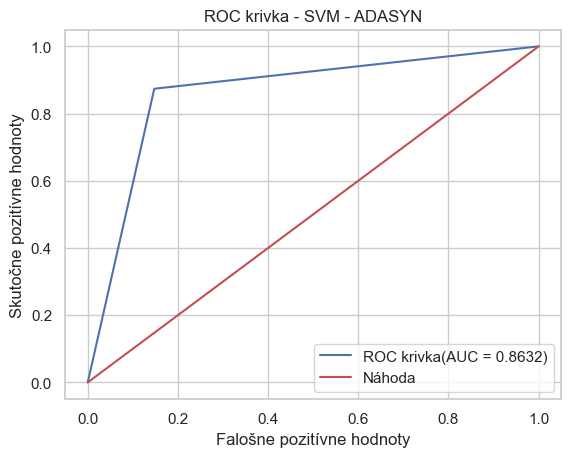

AUC: 0.8631654142446274


In [70]:
# #SVM s nad vzorkovaním ADASYN
#Vytvorenie modelu SVM s následným trénovaním na trénovacích dátach a vytvorenie novej klasifikácie. Parameter karnel sme zvolili lineár. Random state parameter zvoleny 9 pre lepšiu reprodukovateľnosť výsledkov.
model_SVMB = SVC(kernel='linear',random_state=0)
model_SVMB = model_SVMB.fit(x_train_adasyn, y_train_adasyn)
result = model_SVMB.predict(test_data2)

#Nájdenie dôležitých atribútov a ich následné vypísanie
importances_svmBB = model_SVMB.coef_[0]
feature_namesBB = x_train_adasyn.columns
#Grafické zobrazenie dôležitých atribútov.
plt.figure(figsize=(10, 6))
plt.barh(feature_namesBB, importances_svmBB)
plt.xlabel("Dôležitosť")
plt.title("Dôležitosť atribútov - SVM - ADASYN")
plt.show()

#Vytvorenie a vypísanie matice zámen a classification reportu.
ct_svm_adasyn = confusion_matrix(test_label2, result)
print(ct_svm_adasyn)
print(classification_report(test_label2, result,digits=4))

#Výpočet ROC krivky a AUC metriky.
fpreb, tpreb, threshold = roc_curve(test_label2, result)
roc_auceb = auc(fpreb, tpreb)
#Grafické zobrazenie ROC krivky a vypísanie AUC hodnoty
plt.figure()
plt.plot(fpreb, tpreb, color='b', label='ROC krivka(AUC = {:.4f})'.format(roc_auceb))
plt.plot([0, 1], [0, 1], color='r',label='Náhoda')
plt.xlabel('Falošne pozitívne hodnoty')
plt.ylabel('Skutočne pozitívne hodnoty')
plt.title('ROC krivka - SVM - ADASYN')
plt.legend(loc='lower right')
plt.show()
print('AUC:', roc_auceb)

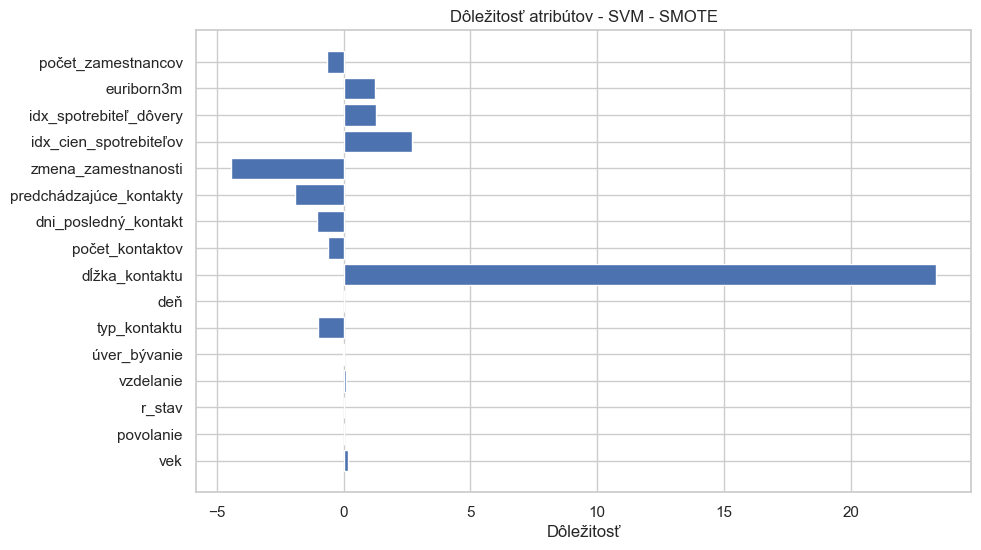

[[8747 1450]
 [ 166 1111]]
              precision    recall  f1-score   support

           0     0.9814    0.8578    0.9154     10197
           1     0.4338    0.8700    0.5789      1277

    accuracy                         0.8592     11474
   macro avg     0.7076    0.8639    0.7472     11474
weighted avg     0.9204    0.8592    0.8780     11474



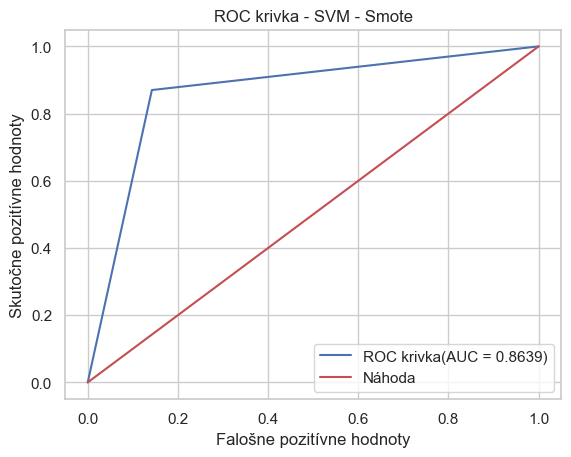

AUC: 0.8639045724827784


In [71]:
#SVM s nad vzorkovaním SMOTE
#Vytvorenie modelu SVM s následným trénovaním na trénovacích dátach a vytvorenie novej klasifikácie. Parameter karnel sme zvolili lineár. Random state parameter zvoleny 9 pre lepšiu reprodukovateľnosť výsledkov.
model_SVMC = SVC(kernel='linear',random_state=0)
model_SVMC = model_SVMC.fit(x_train_smote, y_train_smote)
result = model_SVMC.predict(test_data2)

#Nájdenie dôležitých atribútov a ich následné vypísanie
importances_svmCC = model_SVMC.coef_[0]
feature_namesCC = x_train_smote.columns
#Grafické zobrazenie dôležitých atribútov.
plt.figure(figsize=(10, 6))
plt.barh(feature_namesCC, importances_svmCC)
plt.xlabel("Dôležitosť")
plt.title("Dôležitosť atribútov - SVM - SMOTE")
plt.show()

#Vytvorenie a vypísanie matice zámen a classification reportu.
ct_svm_smote = confusion_matrix(test_label2, result)
print(ct_svm_smote)
print(classification_report(test_label2, result,digits=4))

#Výpočet ROC krivky a AUC metriky.
fprec, tprec, threshold = roc_curve(test_label2, result)
roc_aucec = auc(fprec, tprec)
#Grafické zobrazenie ROC krivky a vypísanie AUC hodnoty
plt.figure()
plt.plot(fprec, tprec, color='b', label='ROC krivka(AUC = {:.4f})'.format(roc_aucec))
plt.plot([0, 1], [0, 1], color='r',label='Náhoda')
plt.xlabel('Falošne pozitívne hodnoty')
plt.ylabel('Skutočne pozitívne hodnoty')
plt.title('ROC krivka - SVM - Smote')
plt.legend(loc='lower right')
plt.show()
print('AUC:', roc_aucec)

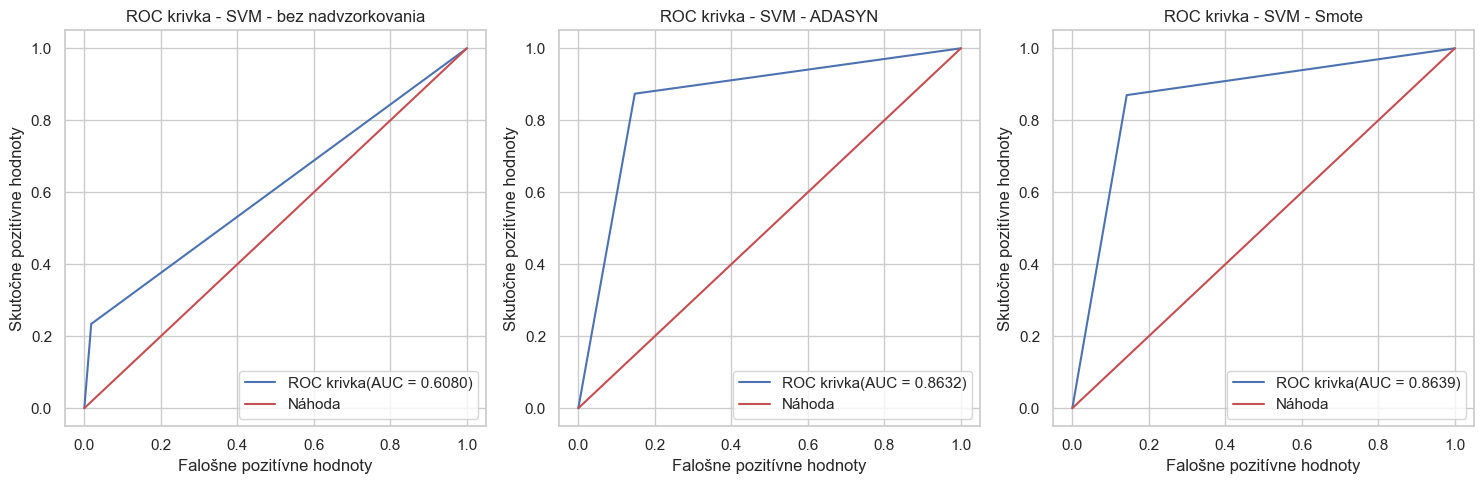

In [72]:
# Vytvorenie grafov ROC kriviek pre SVM modely s jednotlivými typmi nad vzorkovania. Atriibuty: fprea,fpreb,frpec predstavuju falošne pozitívne hodnoty pre jednotlivé modely a trea,treb,trec predstavuju skutočne pozitívne hodnoty pre jednotlivé modely.
plt.figure(figsize=(15, 5))

#Graf ROC krivky bez vzorkovania
plt.subplot(131)
plt.plot(fprea, tprea, color='b', label='ROC krivka(AUC = {:.4f})'.format(roc_aucea))
plt.plot([0, 1], [0, 1], color='r',label='Náhoda')
plt.xlabel('Falošne pozitívne hodnoty')
plt.ylabel('Skutočne pozitívne hodnoty')
plt.title('ROC krivka - SVM - bez nadvzorkovania')
plt.legend(loc='lower right')

#Graf ROC krivky s nad vzorkovaním ADASYN
plt.subplot(132)
plt.plot(fpreb, tpreb, color='b', label='ROC krivka(AUC = {:.4f})'.format(roc_auceb))
plt.plot([0, 1], [0, 1], color='r',label='Náhoda')
plt.xlabel('Falošne pozitívne hodnoty')
plt.ylabel('Skutočne pozitívne hodnoty')
plt.title('ROC krivka - SVM - ADASYN')
plt.legend(loc='lower right')

#Graf ROC krivky s nad vzorkovaním SMOTE
plt.subplot(133)
plt.plot(fprec, tprec, color='b', label='ROC krivka(AUC = {:.4f})'.format(roc_aucec))
plt.plot([0, 1], [0, 1], color='r',label='Náhoda')
plt.xlabel('Falošne pozitívne hodnoty')
plt.ylabel('Skutočne pozitívne hodnoty')
plt.title('ROC krivka - SVM - Smote')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

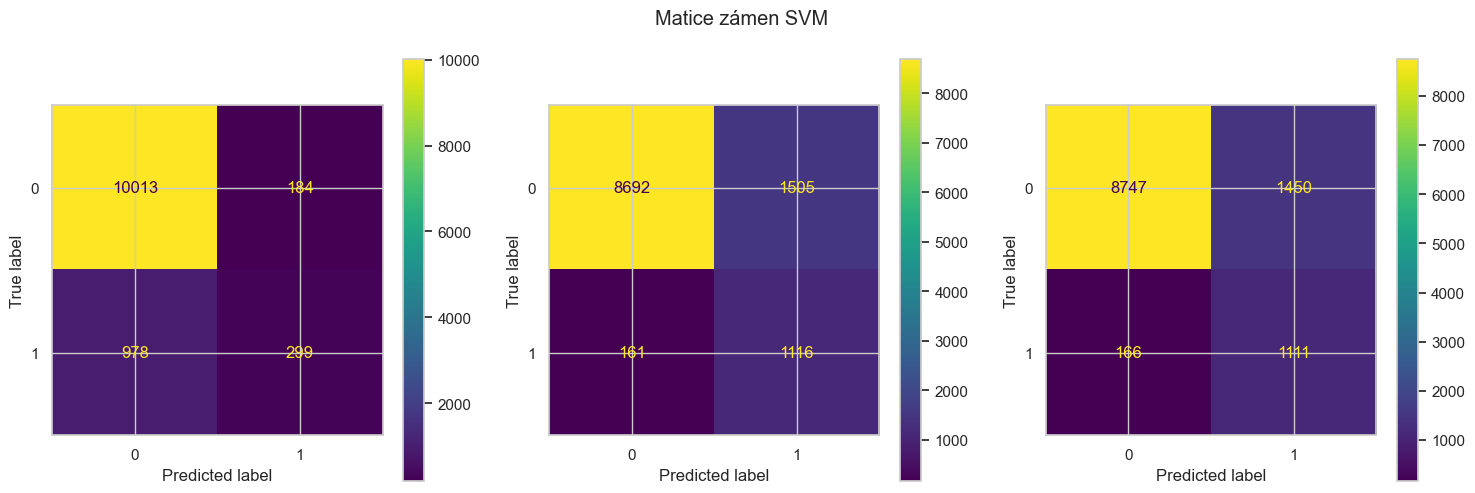

In [73]:
#Zobrazenie matic zámen pre jednotlivé modely SVM v grafickej podobe pomocou ConfusionMatrixDisplay.

fig,axes = plt.subplots(1,3,figsize=(15,5))

disp_1 = ConfusionMatrixDisplay(ct_svm)
disp_1.plot(ax=axes[0], cmap="viridis", values_format="d")

disp_2 = ConfusionMatrixDisplay(ct_svm_adasyn)
disp_2.plot(ax=axes[1], cmap="viridis")

disp_3 = ConfusionMatrixDisplay(ct_svm_smote)
disp_3.plot(ax=axes[2], cmap="viridis")

fig.suptitle("Matice zámen SVM")
plt.tight_layout()
plt.show()

# LR

C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


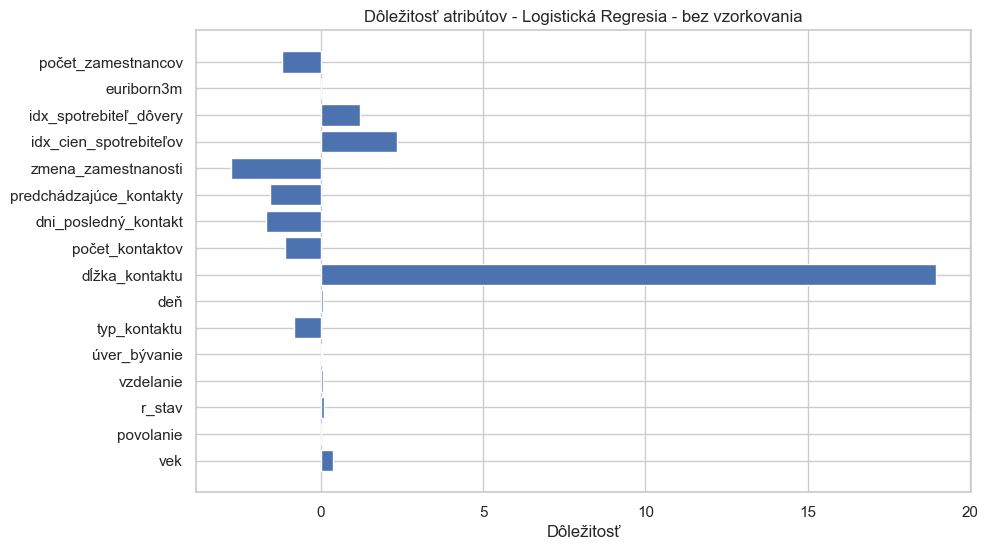

[[9968  229]
 [ 809  468]]
              precision    recall  f1-score   support

           0     0.9249    0.9775    0.9505     10197
           1     0.6714    0.3665    0.4742      1277

    accuracy                         0.9095     11474
   macro avg     0.7982    0.6720    0.7123     11474
weighted avg     0.8967    0.9095    0.8975     11474



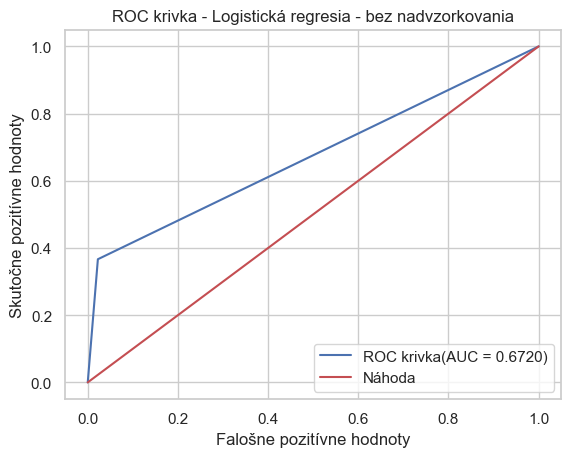

AUC: 0.6720131805929069


In [74]:
#Logistická Regresia bez nad vzorkovania
#Vytvorenie modelu LR s následným trénovaním na trénovacích dátach a vytvorenie novej klasifikácie. Random state parameter zvoleny 0 pre lepšiu reprodukovateľnosť výsledkov.
LM1 = LogisticRegression(random_state=0)
model_LMA = LM1.fit(train_data2, train_label2)
LRresulta = model_LMA.predict(test_data2)

#Nájdenie dôležitých atribútov a ich následné vypísanie
importances_LRa = model_LMA.coef_[0]
feature_namesLRa = train_data2.columns
#Grafické zobrazenie dôležitých atribútov.
plt.figure(figsize=(10, 6))
plt.barh(feature_namesLRa, importances_LRa)
plt.xlabel("Dôležitosť")
plt.title("Dôležitosť atribútov - Logistická Regresia - bez vzorkovania")
plt.show()

#Vytvorenie a vypísanie matice zámen a classification reportu.
ct_lra = confusion_matrix(test_label2, LRresulta) 
print(ct_lra)
print(classification_report(test_label2, LRresulta,digits=4)) 

#Výpočet ROC krivky a AUC metriky.
fprfa, tprfa, threshold = roc_curve(test_label2, LRresulta)
roc_aucfa = auc(fprfa, tprfa)
#Grafické zobrazenie ROC krivky a vypísanie AUC hodnoty
plt.figure()
plt.plot(fprfa, tprfa, color='b', label='ROC krivka(AUC = {:.4f})'.format(roc_aucfa))
plt.plot([0, 1], [0, 1], color='r',label='Náhoda')
plt.xlabel('Falošne pozitívne hodnoty')
plt.ylabel('Skutočne pozitívne hodnoty')
plt.title('ROC krivka - Logistická regresia - bez nadvzorkovania')
plt.legend(loc='lower right')
plt.show()
print('AUC:', roc_aucfa)

C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


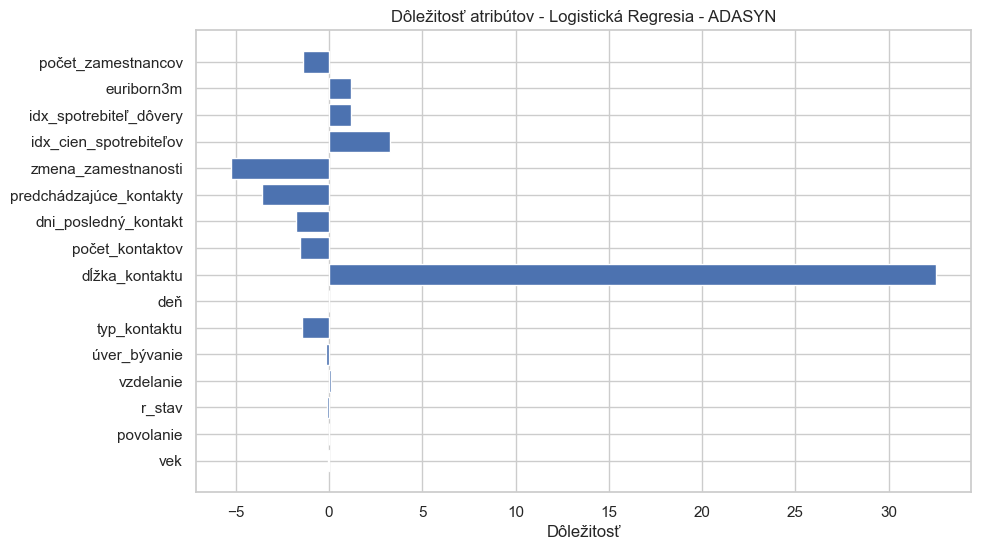

[[8787 1410]
 [ 186 1091]]
              precision    recall  f1-score   support

           0     0.9793    0.8617    0.9167     10197
           1     0.4362    0.8543    0.5776      1277

    accuracy                         0.8609     11474
   macro avg     0.7077    0.8580    0.7471     11474
weighted avg     0.9188    0.8609    0.8790     11474



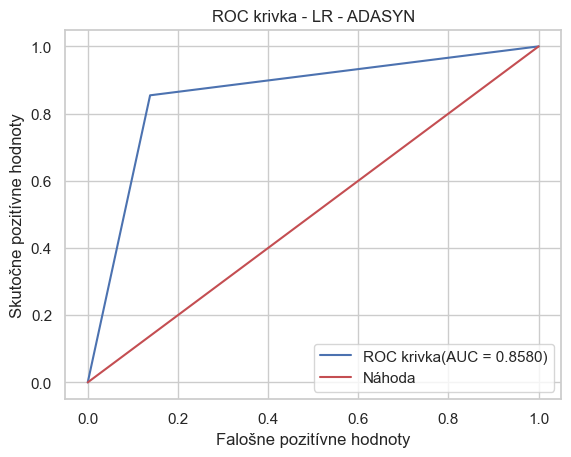

AUC: 0.8580350801044021


In [75]:
#Logistická Regresia s nad vzorkovanim ADASYN
#Vytvorenie modelu LR s následným trénovaním na trénovacích dátach a vytvorenie novej klasifikácie. Random state parameter zvoleny 0 pre lepšiu reprodukovateľnosť výsledkov.
LM1 = LogisticRegression(random_state=0)
model_LMB = LM1.fit(x_train_adasyn, y_train_adasyn)
LRresultb = model_LMB.predict(test_data2)

#Nájdenie dôležitých atribútov a ich následné vypísanie
importances_LRb = model_LMB.coef_[0]
feature_namesLRb = x_train_adasyn.columns
#Grafické zobrazenie dôležitých atribútov.
plt.figure(figsize=(10, 6))
plt.barh(feature_namesLRb, importances_LRb)
plt.xlabel("Dôležitosť")
plt.title("Dôležitosť atribútov - Logistická Regresia - ADASYN")
plt.show()

#Vytvorenie a vypísanie matice zámen a classification reportu.
ct_lr_adasyn = confusion_matrix(test_label2, LRresultb) 
print(ct_lr_adasyn)
print(classification_report(test_label2, LRresultb,digits=4))

#Výpočet ROC krivky a AUC metriky.
fprfb, tprfb, threshold = roc_curve(test_label2, LRresultb)
roc_aucfb = auc(fprfb, tprfb)
#Grafické zobrazenie ROC krivky a vypísanie AUC hodnoty
plt.figure()
plt.plot(fprfb, tprfb, color='b', label='ROC krivka(AUC = {:.4f})'.format(roc_aucfb))
plt.plot([0, 1], [0, 1], color='r',label='Náhoda')
plt.xlabel('Falošne pozitívne hodnoty')
plt.ylabel('Skutočne pozitívne hodnoty')
plt.title('ROC krivka - LR - ADASYN')
plt.legend(loc='lower right')
plt.show()
print('AUC:', roc_aucfb)

C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


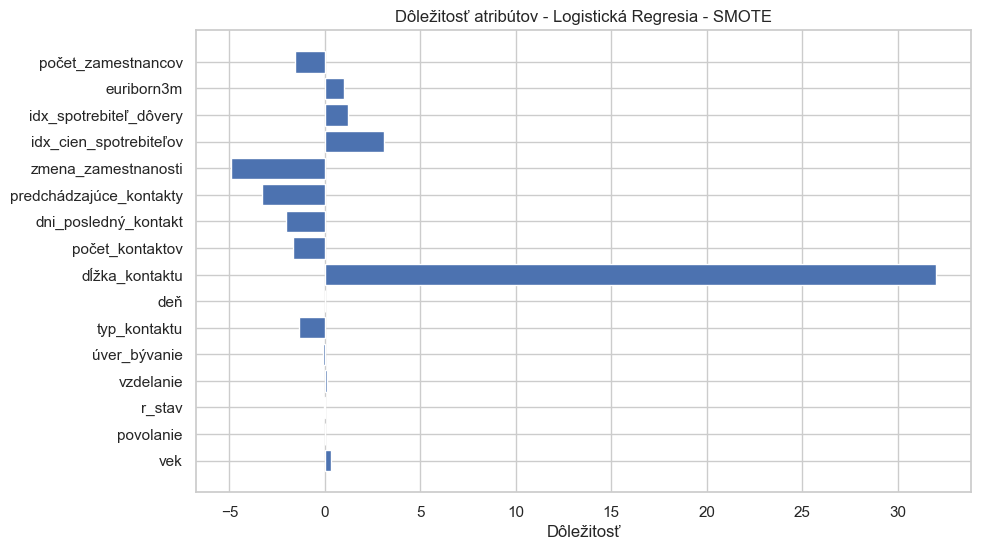

[[8823 1374]
 [ 201 1076]]
              precision    recall  f1-score   support

           0     0.9777    0.8653    0.9181     10197
           1     0.4392    0.8426    0.5774      1277

    accuracy                         0.8627     11474
   macro avg     0.7085    0.8539    0.7477     11474
weighted avg     0.9178    0.8627    0.8801     11474



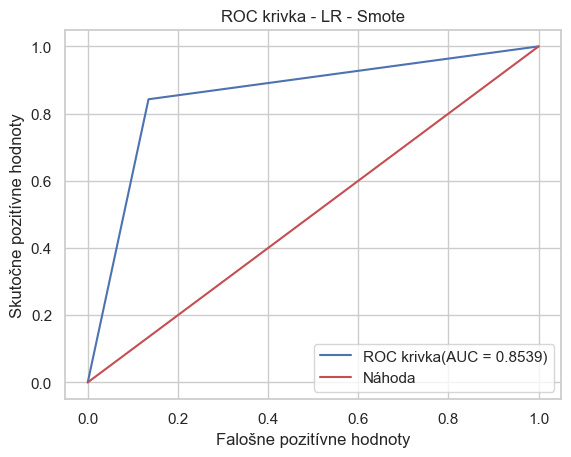

AUC: 0.8539271649983193


In [76]:
#Logistická Regresia s nad vzorkovanim SMOTE
#Vytvorenie modelu LR s následným trénovaním na trénovacích dátach a vytvorenie novej klasifikácie. Random state parameter zvoleny 0 pre lepšiu reprodukovateľnosť výsledkov.
LM1 = LogisticRegression(random_state=0)
model_LMC = LM1.fit(x_train_smote, y_train_smote)
LRresultc = model_LMC.predict(test_data2)

#Nájdenie dôležitých atribútov a ich následné vypísanie
importances_LRc = model_LMC.coef_[0]
feature_namesLRc = x_train_smote.columns
#Grafické zobrazenie dôležitých atribútov.
plt.figure(figsize=(10, 6))
plt.barh(feature_namesLRc, importances_LRc)
plt.xlabel("Dôležitosť")
plt.title("Dôležitosť atribútov - Logistická Regresia - SMOTE")
plt.show()

#Vytvorenie a vypísanie matice zámen a classification reportu.
ct_lr_smote = confusion_matrix(test_label2, LRresultc) 
print(ct_lr_smote)
print(classification_report(test_label2, LRresultc,digits=4))

#Výpočet ROC krivky a AUC metriky.
fprfc, tprfc, threshold = roc_curve(test_label2, LRresultc)
roc_aucfc = auc(fprfc, tprfc)

#Grafické zobrazenie ROC krivky a vypísanie AUC hodnoty
plt.figure()
plt.plot(fprfc, tprfc, color='b', label='ROC krivka(AUC = {:.4f})'.format(roc_aucfc))
plt.plot([0, 1], [0, 1], color='r',label='Náhoda')
plt.xlabel('Falošne pozitívne hodnoty')
plt.ylabel('Skutočne pozitívne hodnoty')
plt.title('ROC krivka - LR - Smote')
plt.legend(loc='lower right')
plt.show()
print('AUC:', roc_aucfc)

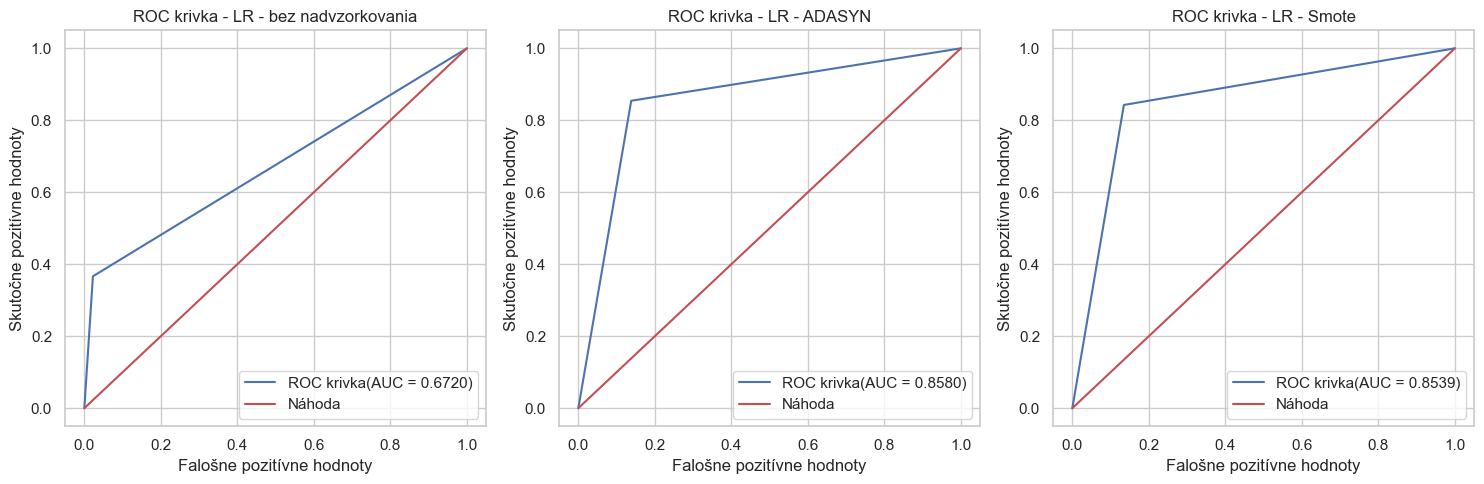

In [77]:
# Vytvorenie grafov ROC kriviek pre LR modely s jednotlivými typmi nad vzorkovania. Atriibuty: fprfa,fprfb,frpfc predstavuju falošne pozitívne hodnoty pre jednotlivé modely a trfa,trfb,trfc predstavuju skutočne pozitívne hodnoty pre jednotlivé modely.
plt.figure(figsize=(15, 5))

#Graf ROC krivky bez vzorkovania
plt.subplot(131)
plt.plot(fprfa, tprfa, color='b', label='ROC krivka(AUC = {:.4f})'.format(roc_aucfa))
plt.plot([0, 1], [0, 1], color='r',label='Náhoda')
plt.xlabel('Falošne pozitívne hodnoty')
plt.ylabel('Skutočne pozitívne hodnoty')
plt.title('ROC krivka - LR - bez nadvzorkovania')
plt.legend(loc='lower right')

#Graf ROC krivky s nad vzorkovaním ADASYN
plt.subplot(132)
plt.plot(fprfb, tprfb, color='b', label='ROC krivka(AUC = {:.4f})'.format(roc_aucfb))
plt.plot([0, 1], [0, 1], color='r',label='Náhoda')
plt.xlabel('Falošne pozitívne hodnoty')
plt.ylabel('Skutočne pozitívne hodnoty')
plt.title('ROC krivka - LR - ADASYN')
plt.legend(loc='lower right')

#Graf ROC krivky s nad vzorkovaním SMOTE
plt.subplot(133)
plt.plot(fprfc, tprfc, color='b', label='ROC krivka(AUC = {:.4f})'.format(roc_aucfc))
plt.plot([0, 1], [0, 1], color='r',label='Náhoda')
plt.xlabel('Falošne pozitívne hodnoty')
plt.ylabel('Skutočne pozitívne hodnoty')
plt.title('ROC krivka - LR - Smote')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

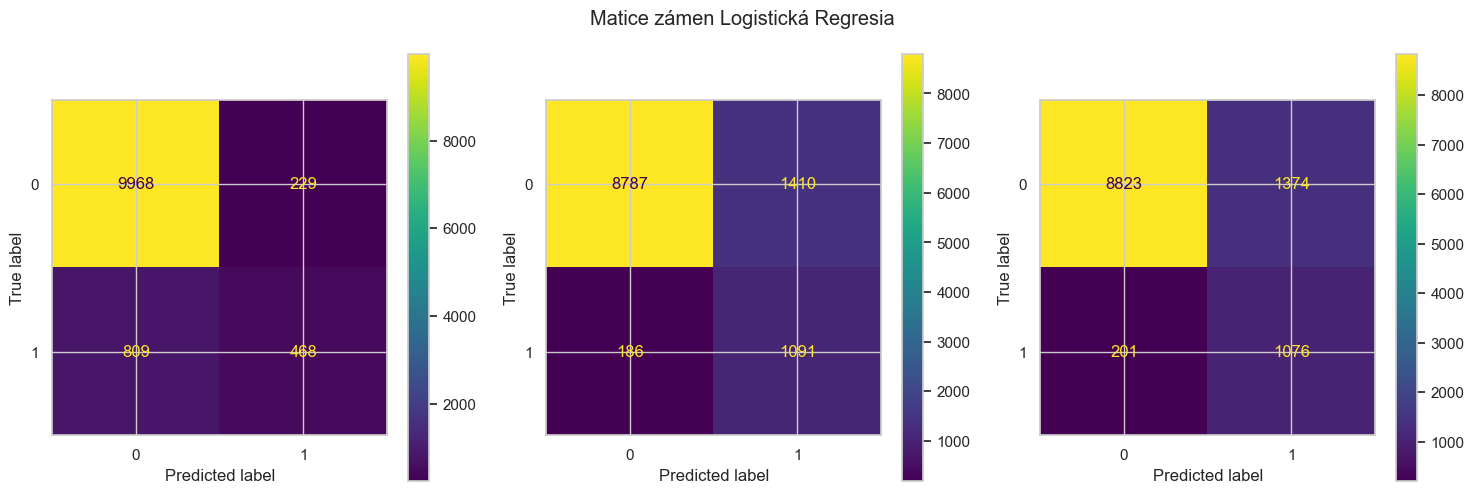

In [78]:
#Zobrazenie matic zámen pre jednotlivé modely Logistickej Regresie v grafickej podobe pomocou ConfusionMatrixDisplay.
fig,axes = plt.subplots(1,3,figsize=(15,5))

disp_1 = ConfusionMatrixDisplay(ct_lra)
disp_1.plot(ax=axes[0], cmap="viridis", values_format="d")

disp_2 = ConfusionMatrixDisplay(ct_lr_adasyn)
disp_2.plot(ax=axes[1], cmap="viridis")

disp_3 = ConfusionMatrixDisplay(ct_lr_smote)
disp_3.plot(ax=axes[2], cmap="viridis")

fig.suptitle("Matice zámen Logistická Regresia")
plt.tight_layout()
plt.show()

# Porovnanie s atributmi z chi-kvadrat testu

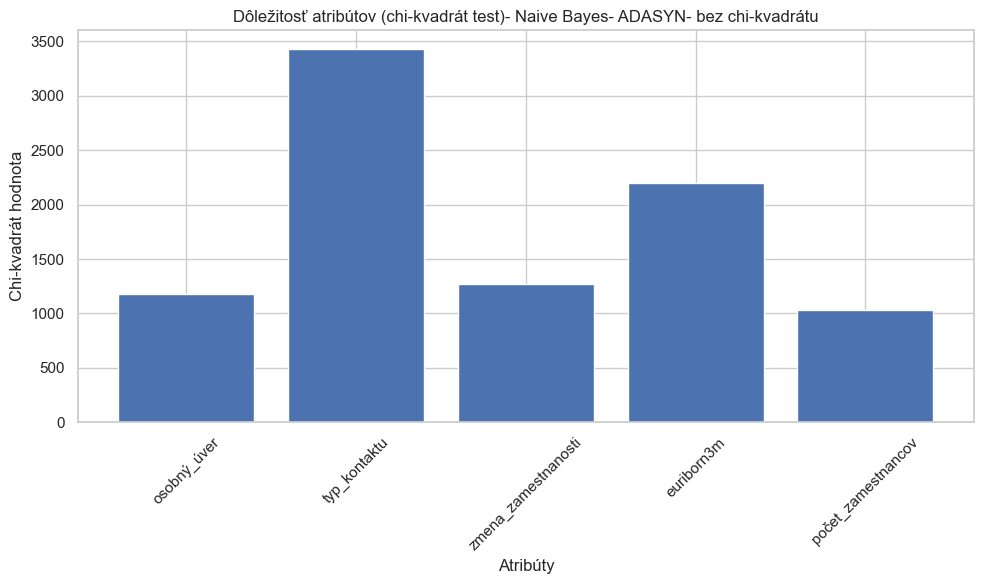

col_0     0     1
y                
0      7777  2420
1       334   943
              precision    recall  f1-score   support

           0     0.9588    0.7627    0.8496     10197
           1     0.2804    0.7384    0.4065      1277

    accuracy                         0.7600     11474
   macro avg     0.6196    0.7506    0.6280     11474
weighted avg     0.8833    0.7600    0.8003     11474



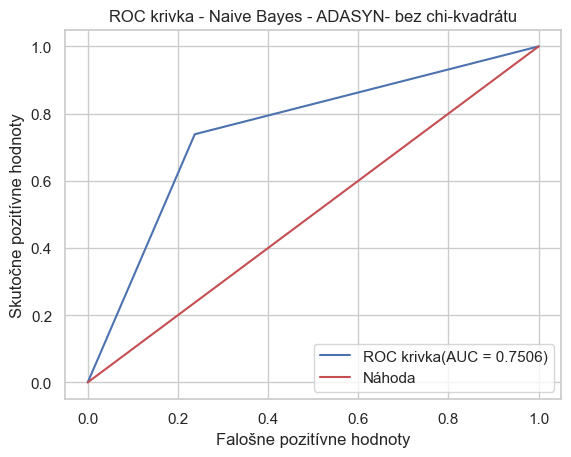

AUC0.7505623938251988


In [79]:
#Naive Bayes s nad vzorkovaním ADASYN
#Vytvorenie modelu Nive Bayes a následne trenovanie a vytvorenie novej klasifikácie.
modelBCS = GaussianNB()
modelBCS.fit(x_train_adasyn2, y_train_adasyn2)
resultBS = modelBCS.predict(test_data1)

#Výber najdôležitejších 5 atributov a ich zobrazenie zobrazenie.
selectorBS = SelectKBest(chi2, k=5)
selected_train_dataBS = selectorBS.fit_transform(x_train_adasyn2, y_train_adasyn2)
selected_indicesBS = selectorBS.get_support(indices=True)
selected_feature_namesBS = [x_train_adasyn2.columns[i] for i in selected_indicesBS]
#Zobrazenie grafu s dôležitých atribútov.
plt.figure(figsize=(10, 6))
plt.bar(selected_feature_namesBS, selectorBS.scores_[selected_indicesBS])
plt.xlabel("Atribúty")
plt.ylabel("Chi-kvadrát hodnota")
plt.title("Dôležitosť atribútov (chi-kvadrát test)- Naive Bayes- ADASYN- bez chi-kvadrátu")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()                

#Zobrazenie matice zámen a reportu klasifikácie.
ct_bayes_adasynS = pd.crosstab(test_label1, resultBS)
print(ct_bayes_adasynS)                        
print(classification_report(test_label1, resultBS,digits=4))

#Vytvorenie ROC krivky a vypočítanie AUC hodnoty s následným zobrazením ROC krivky a vypísaním AUC hodnoty.
fpracS, tpracS, _ = roc_curve(test_label1, resultBS)
roc_aucacS = auc(fpracS, tpracS)

#Zobrazenie grafu ROC krivky a vypísanie samostatného atribútu AUC. V grafe je AUC zobrazene na 4 desatinné miesta.
plt.plot(fpracS, tpracS, color='b', label='ROC krivka(AUC = {:.4f})'.format(roc_aucacS))
plt.plot([0, 1], [0, 1], color='r',label='Náhoda')
plt.xlabel('Falošne pozitívne hodnoty')
plt.ylabel('Skutočne pozitívne hodnoty')
plt.title('ROC krivka - Naive Bayes - ADASYN- bez chi-kvadrátu')
plt.legend(loc='lower right')
plt.show()
print('AUC' + str(roc_aucacS))



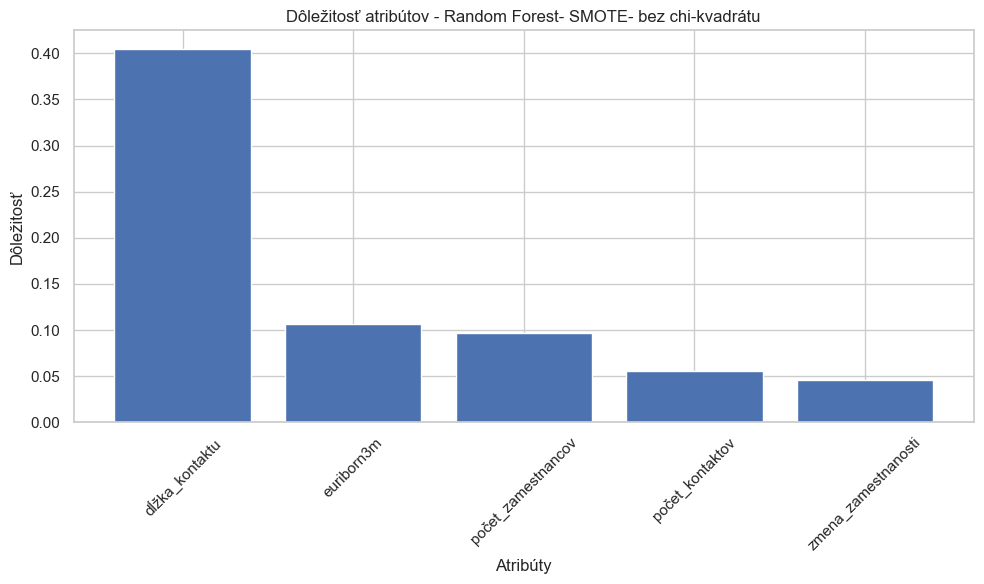

col_0     0    1
y               
0      9530  667
1       397  880
              precision    recall  f1-score   support

           0     0.9600    0.9346    0.9471     10197
           1     0.5688    0.6891    0.6232      1277

    accuracy                         0.9073     11474
   macro avg     0.7644    0.8119    0.7852     11474
weighted avg     0.9165    0.9073    0.9111     11474



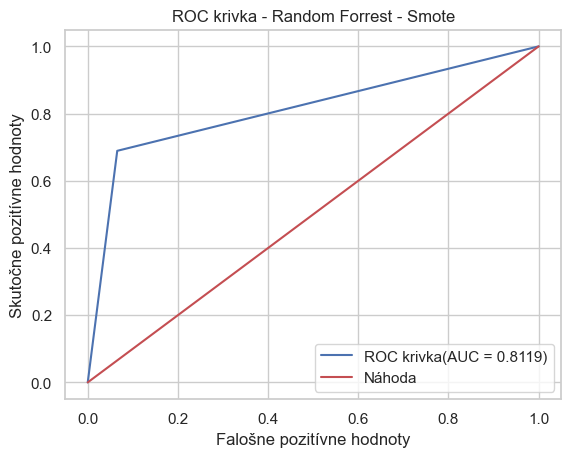

AUC: 0.8118518590194468


In [80]:
##Random Forrest s nad vzorkovaním SMOTE ale s atribútmi, ktoré boli odstránené na základe chi-kvadrát testu
#Vytvorenie modelu Random forest pomocou funkcie RandomForestClassifier, natrénovanie modelu a vytvorenie novej klasifikácie do premennej pred. Parameter random_state pre dosahovanie reprodukovateľných výsledkov.
model_rfCa = RandomForestClassifier(random_state=0)
model_rfCa.fit(x_train_smote2, y_train_smote2)
pred3a = model_rfCa.predict(test_data1)

#Získanie 5 najdôležitejších atribútov pri trénovaní daného modelu a zobrezenie týchto atribútov na grafe.
importances_rfCa = model_rfCa.feature_importances_
sorted_indicesCa = importances_rfCa.argsort()[::-1]
top_feature_indicesCa = sorted_indicesCa[:5]
top_feature_namesCa = [x_train_smote2.columns[i] for i in top_feature_indicesCa]
#Zobrazenie najdôležitejších atribútov na grafe.
plt.figure(figsize=(10, 6))
plt.bar(top_feature_namesCa, importances_rfCa[top_feature_indicesCa])
plt.xlabel("Atribúty")
plt.ylabel("Dôležitosť")
plt.title("Dôležitosť atribútov - Random Forest- SMOTE- bez chi-kvadrátu")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Vytvorenie a vypísanie matice zámen s classification reportu
ct_rf_smotea = pd.crosstab(test_label1, pred3a)
print(ct_rf_smotea)
print(classification_report(test_label1, pred3a,digits=4))

#Vytvorenie ROC krivky a vypočítanie AUC hodnoty s následným zobrazením ROC krivky a vypísaním AUC hodnoty.
fprccs, tprccs, threshold = roc_curve(test_label1, pred3a)
roc_aucccs = auc(fprccs, tprccs)

#Zobrazenie grafu ROC krivky a vypísanie samostatného atribútu AUC. V grafe je AUC zobrazene na 4 desatinné miesta.
plt.figure()
plt.plot(fprccs, tprccs, color='b', label='ROC krivka(AUC = {:.4f})'.format(roc_aucccs))
plt.plot([0, 1], [0, 1], color='r',label='Náhoda')
plt.xlabel('Falošne pozitívne hodnoty')
plt.ylabel('Skutočne pozitívne hodnoty')
plt.title('ROC krivka - Random Forrest - Smote')
plt.legend(loc='lower right')
plt.show()
print('AUC:', roc_aucccs)

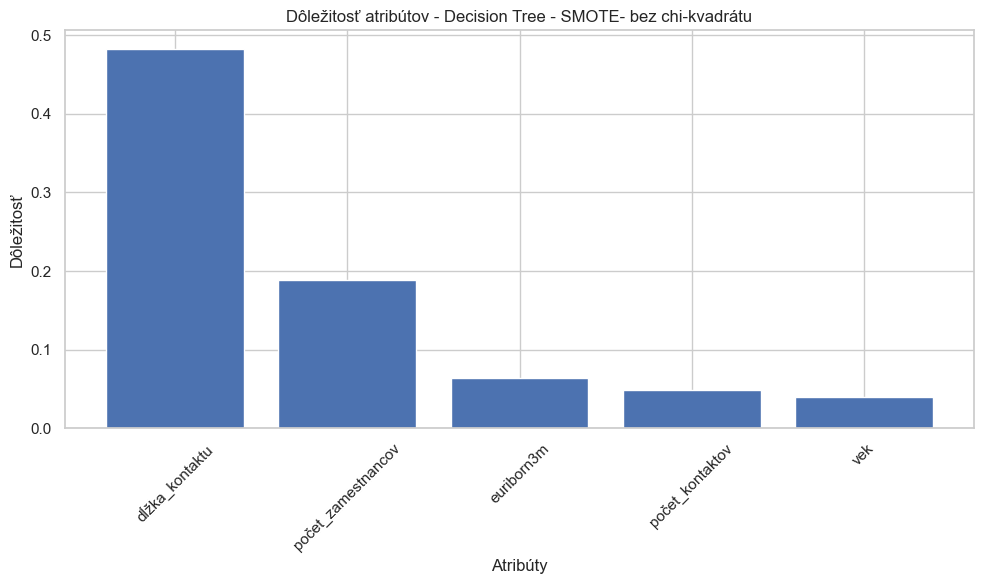

col_0     0    1
y               
0      9356  841
1       519  758
              precision    recall  f1-score   support

           0     0.9474    0.9175    0.9322     10197
           1     0.4740    0.5936    0.5271      1277

    accuracy                         0.8815     11474
   macro avg     0.7107    0.7556    0.7297     11474
weighted avg     0.8948    0.8815    0.8872     11474



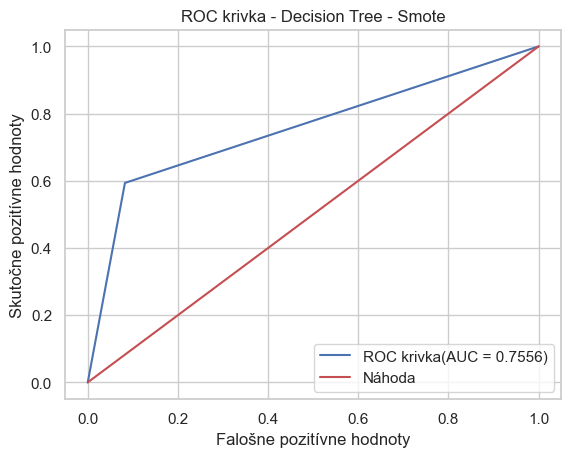

AUC: 0.7555517311316324


In [81]:
##Decision Tree s nad vzorkovaním SMOTE ale s atribútmi, ktoré boli odstránené na základe chi-kvadrát testu
#Vytvorenie modelu pomocou funkcie DecisionTreeClassifier s následovným trénovaním modelu a novou klasifikáciou cieľového atribútu. Opätovné využitie parametra random_state pre reprodukovateľnosť výsledkov.
model_DTCS = DecisionTreeClassifier(random_state=0)
model_DTCS = model_DTCS.fit(x_train_smote2, y_train_smote2)
result2a = model_DTCS.predict(test_data1)

#Získanie 5 najdôležitejších atribútov pri trénovaní daného modelu a zobrezenie týchto atribútov na grafe.
importances_dtCCa = model_DTCS.feature_importances_
sorted_indicesCCa = importances_dtCCa.argsort()[::-1]
top_feature_indicesCCa = sorted_indicesCCa[:5]
top_feature_namesCC = [x_train_smote2.columns[i] for i in top_feature_indicesCCa]
#Zobrazenie najdôležitejších atribútov na grafe.
plt.figure(figsize=(10, 6))
plt.bar(top_feature_namesCC, importances_dtCC[top_feature_indicesCC])
plt.xlabel("Atribúty")
plt.ylabel("Dôležitosť")
plt.title("Dôležitosť atribútov - Decision Tree - SMOTE- bez chi-kvadrátu")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Vytvorenie a vypísanie matice zámen s classification reportu
ct_dt_smotea = pd.crosstab(test_label1, result2a)
print(ct_dt_smotea)
print(classification_report(test_label1, result2a,digits=4))

#Vytvorenie ROC krivky a vypočítanie AUC hodnoty s následným zobrazením ROC krivky a vypísaním AUC hodnoty.
fprdcs, tprdcs, threshold = roc_curve(test_label1, result2a)
roc_aucdcs = auc(fprdcs, tprdcs)

#Zobrazenie grafu ROC krivky a vypísanie samostatného atribútu AUC. V grafe je AUC zobrazene na 4 desatinné miesta.
plt.figure()
plt.plot(fprdcs, tprdcs, color='b', label='ROC krivka(AUC = {:.4f})'.format(roc_aucdcs))
plt.plot([0, 1], [0, 1], color='r',label='Náhoda')
plt.xlabel('Falošne pozitívne hodnoty')
plt.ylabel('Skutočne pozitívne hodnoty')
plt.title('ROC krivka - Decision Tree - Smote')
plt.legend(loc='lower right')
plt.show()
print('AUC:', roc_aucdcs)

C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


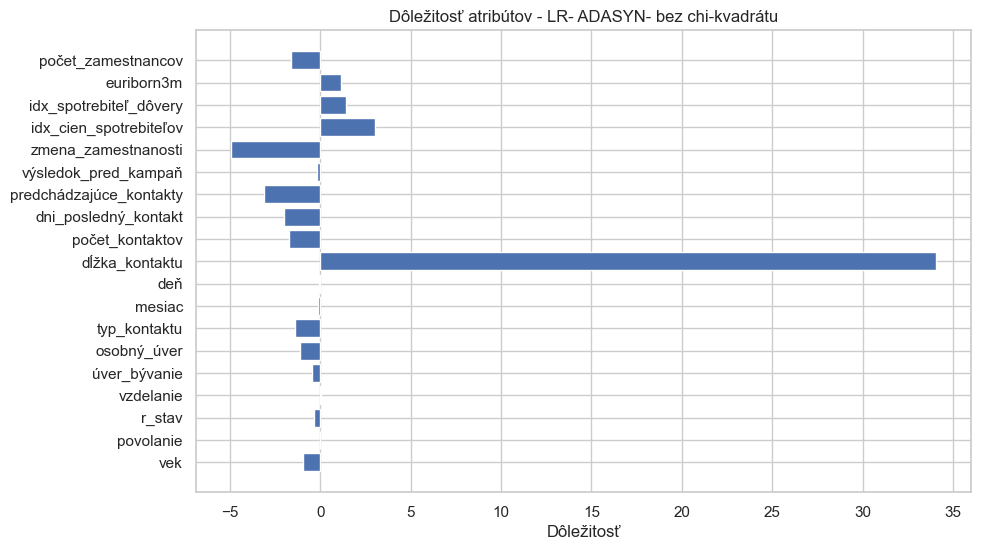

col_0     0     1
y                
0      8829  1368
1       198  1079
              precision    recall  f1-score   support

           0     0.9781    0.8658    0.9185     10197
           1     0.4409    0.8449    0.5795      1277

    accuracy                         0.8635     11474
   macro avg     0.7095    0.8554    0.7490     11474
weighted avg     0.9183    0.8635    0.8808     11474



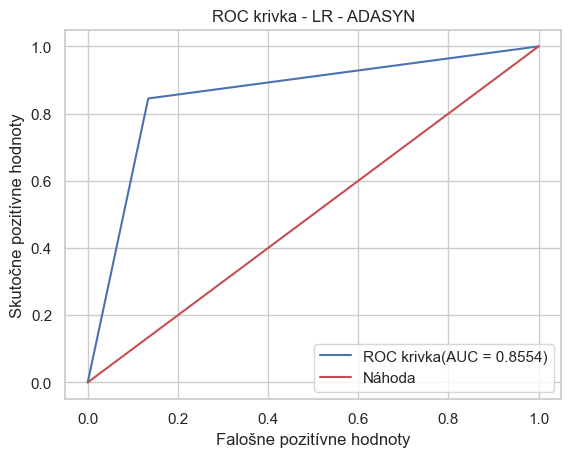

AUC: 0.8553959972104744


In [82]:
##Logistic Refression s nad vzorkovaním ADASYN ale s atribútmi, ktoré boli odstránené na základe chi-kvadrát testu
#Vytvorenie modelu pomocou funkcie LogisticRegression s následovným trénovaním modelu a novou klasifikáciou cieľového atribútu. Opätovné využitie parametra random_state pre reprodukovateľnosť výsledkov.
LM1a = LogisticRegression(random_state=0)
LM1a = LM1a.fit(x_train_adasyn2, y_train_adasyn2)
LRresultca = LM1a.predict(test_data1)

#Získanie 5 najdôležitejších atribútov pri trénovaní daného modelu a zobrezenie týchto atribútov na grafe.
importances_LRca = LM1a.coef_[0]
feature_namesLRca = x_train_adasyn2.columns
#Zobrazenie najdôležitejších atribútov na grafe.
plt.figure(figsize=(10, 6))
plt.barh(feature_namesLRca, importances_LRca)
plt.xlabel("Dôležitosť")
plt.title("Dôležitosť atribútov - LR- ADASYN- bez chi-kvadrátu")
plt.show()

#Vytvorenie a vypísanie matice zámen s classification reportu
ct_lr_adasynd = pd.crosstab(test_label1, LRresultca) 
print(ct_lr_adasynd)
print(classification_report(test_label1, LRresultca,digits=4))

#Vytvorenie ROC krivky a vypočítanie AUC hodnoty s následným zobrazením ROC krivky a vypísaním AUC hodnoty.
fprfd, tprfd, threshold = roc_curve(test_label1, LRresultca)
roc_aucfd = auc(fprfd, tprfd)

#Zobrazenie grafu ROC krivky a vypísanie samostatného atribútu AUC. V grafe je AUC zobrazene na 4 desatinné miesta.
plt.figure()
plt.plot(fprfd, tprfd, color='b', label='ROC krivka(AUC = {:.4f})'.format(roc_aucfd))
plt.plot([0, 1], [0, 1], color='r',label='Náhoda')
plt.xlabel('Falošne pozitívne hodnoty')
plt.ylabel('Skutočne pozitívne hodnoty')
plt.title('ROC krivka - LR - ADASYN')
plt.legend(loc='lower right')
plt.show()
print('AUC:', roc_aucfd)

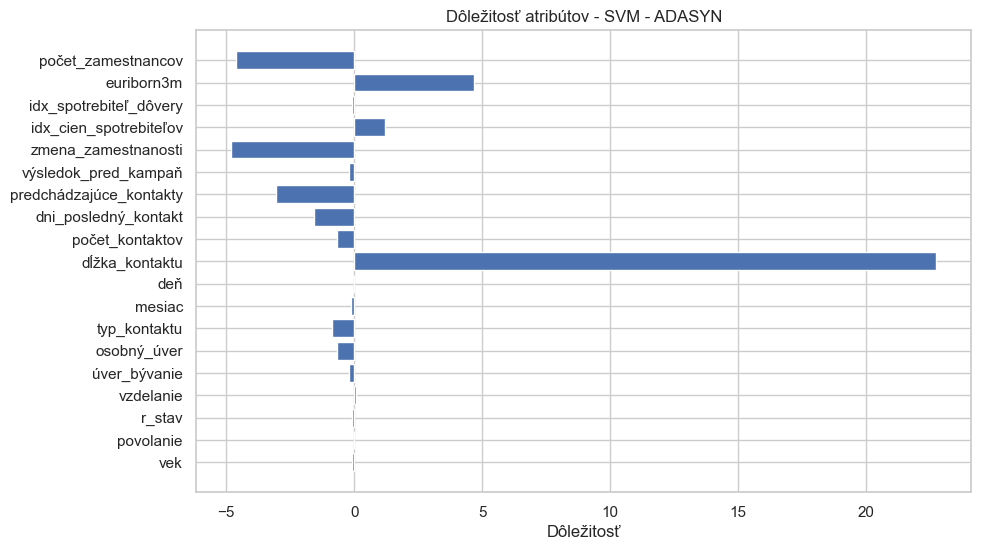

col_0     0     1
y                
0      8686  1511
1       160  1117
              precision    recall  f1-score   support

           0     0.9819    0.8518    0.9123     10197
           1     0.4250    0.8747    0.5721      1277

    accuracy                         0.8544     11474
   macro avg     0.7035    0.8633    0.7422     11474
weighted avg     0.9199    0.8544    0.8744     11474



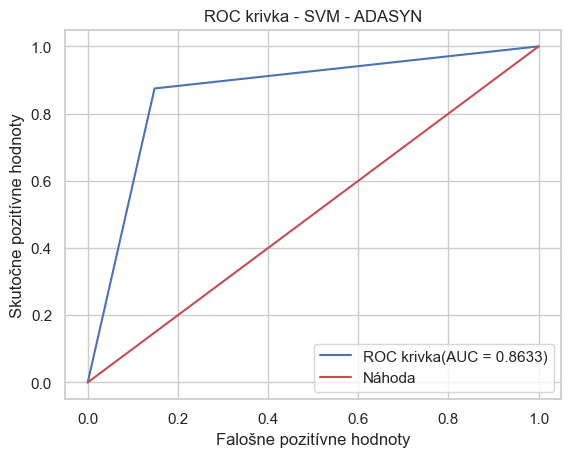

AUC: 0.8632627527450801


In [85]:
##Support Vector Machine s nad vzorkovaním SMOTE ale s atribútmi, ktoré boli odstránené na základe chi-kvadrát testu
#Vytvorenie modelu SVM s následným trénovaním na trénovacích dátach a vytvorenie novej klasifikácie. Parameter karnel sme zvolili lineár. Random state parameter zvoleny 9 pre lepšiu reprodukovateľnosť výsledkov.
model_SVMD = SVC(kernel='linear',random_state=0)
model_SVMD = model_SVMD.fit(x_train_smote2, y_train_smote2)
result = model_SVMD.predict(test_data1)

#Získanie 5 najdôležitejších atribútov pri trénovaní daného modelu a zobrezenie týchto atribútov na grafe.
importances_svmBD = model_SVMD.coef_[0]
feature_namesBD = x_train_smote2.columns
#Zobrazenie najdôležitejších atribútov na grafe.
plt.figure(figsize=(10, 6))
plt.barh(feature_namesBD, importances_svmBD)
plt.xlabel("Dôležitosť")
plt.title("Dôležitosť atribútov - SVM - ADASYN")
plt.show()

#Vytvorenie a vypísanie matice zámen s classification reportu
ct_svm_smote2 = pd.crosstab(test_label1, result)
print(ct_svm_smote2)
print(classification_report(test_label1, result,digits=4))

#Vytvorenie ROC krivky a vypočítanie AUC hodnoty s následným zobrazením ROC krivky a vypísaním AUC hodnoty.
fpred, tpred, threshold = roc_curve(test_label1, result)
roc_auced = auc(fpred, tpred)

#Zobrazenie grafu ROC krivky a vypísanie samostatného atribútu AUC. V grafe je AUC zobrazene na 4 desatinné miesta.
plt.figure()
plt.plot(fpred, tpred, color='b', label='ROC krivka(AUC = {:.4f})'.format(roc_auced))
plt.plot([0, 1], [0, 1], color='r',label='Náhoda')
plt.xlabel('Falošne pozitívne hodnoty')
plt.ylabel('Skutočne pozitívne hodnoty')
plt.title('ROC krivka - SVM - ADASYN')
plt.legend(loc='lower right')
plt.show()
print('AUC:', roc_auced)

col_0     0     1
y                
0      7958  2239
1       384   893
              precision    recall  f1-score   support

           0     0.9540    0.7804    0.8585     10197
           1     0.2851    0.6993    0.4051      1277

    accuracy                         0.7714     11474
   macro avg     0.6195    0.7399    0.6318     11474
weighted avg     0.8795    0.7714    0.8080     11474



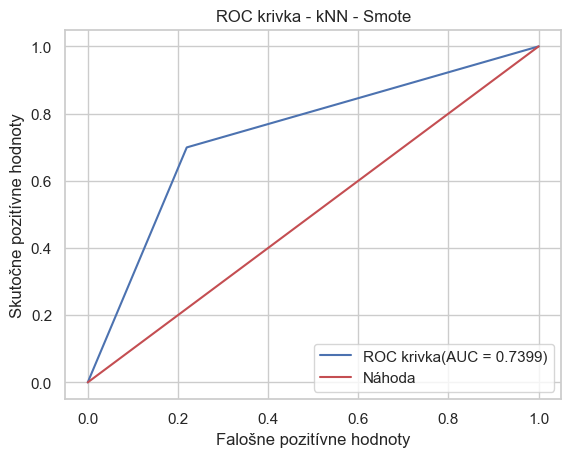

AUC: 0.7398604192781991


In [86]:
##kNN s nad vzorkovaním ADASYN ale s atribútmi, ktoré boli odstránené na základe chi-kvadrát testu                                        
#Vytvorenie modelu knn pomocou kNeighborsClassifier funkcie, následné trénovanie modelu a vytvorenie nových klasifikácií.
model1d = KNeighborsClassifier(n_neighbors = 31)
fitad = model1d.fit(x_train_adasyn2, y_train_adasyn2)
res3d = model1d.predict(test_data1)

#Vytvorenie a vypísanie matice zámen s classification reportu
ct_knn_adasynd = pd.crosstab(test_label1, res3d)
print(ct_knn_adasynd)  
print(classification_report(test_label1, res3d,digits=4))

#Vytvorenie ROC krivky a vypočítanie AUC hodnoty s následným zobrazením ROC krivky a vypísaním AUC hodnoty.
fprbd, tprbd, threshold = roc_curve(test_label1, res3d)
roc_aucbd = auc(fprbd, tprbd)

#Zobrazenie grafu ROC krivky a vypísanie samostatného atribútu AUC. V grafe je AUC zobrazene na 4 desatinné miesta.
plt.figure()
plt.plot(fprbd, tprbd, color='b', label='ROC krivka(AUC = {:.4f})'.format(roc_aucbd))
plt.plot([0, 1], [0, 1], color='r',label='Náhoda')
plt.xlabel('Falošne pozitívne hodnoty')
plt.ylabel('Skutočne pozitívne hodnoty')
plt.title('ROC krivka - kNN - Smote')
plt.legend(loc='lower right')
plt.show()
print('AUC:', roc_aucbd)